In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv("HealthCareAnalytics.csv")

# Features


case_id: Unique identifier for each hospital admission record.

Hospital_code: Code representing the specific hospital.

Hospital_type_code: Code indicating the type of hospital (e.g., a, b, c, etc.).

City_Code_Hospital: Code representing the city where the hospital is located.

Hospital_region_code: Code for the region in which the hospital is situated (e.g., X, Y, Z).

Available_Extra_Rooms_in_Hospital: Number of extra rooms available in the hospital at the time of admission.

Department: Department where the patient is being treated (e.g., radiotherapy, anesthesia, gynecology).

Ward_Type: Type of hospital ward (e.g., R, S, Q, etc.).

Ward_Facility_Code: Code representing facilities available in the ward (e.g., A, B, C).

Bed_Grade: Grade or quality rating of the bed assigned to the patient.

patientid: Unique identifier for each patient.

City_Code_Patient: Code representing the patient’s city of residence.

Type_of_Admission: Type of hospital admission (e.g., Emergency, Trauma, Urgent).

Severity_of_Illness: Severity of the patient’s condition (e.g., Minor, Moderate, Extreme).

Visitors_with_Patient: Number of visitors accompanying the patient.

Age: Age range of the patient (e.g., 0-10, 21-30, 51-60).

Admission_Deposit: Deposit amount paid at the time of admission.

Stay: Target variable representing the length of hospital stay (e.g., 0-10 days, 11-20 days, etc.).

In [6]:
df.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available_Extra_Rooms_in_Hospital,Department,Ward_Type,Ward_Facility_Code,Bed_Grade,patientid,City_Code_Patient,Type_of_Admission,Severity_of_Illness,Visitors_with_Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558,41-50


In [8]:
df.Stay.unique()

array(['0-10', '41-50', '31-40', 'Nov-20', '51-60', '21-30', '71-80',
       'More than 100 Days', '81-90', '61-70', '91-100'], dtype=object)

In [10]:
df.shape

(318438, 18)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318438 entries, 0 to 318437
Data columns (total 18 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   case_id                            318438 non-null  int64  
 1   Hospital_code                      318438 non-null  int64  
 2   Hospital_type_code                 318438 non-null  object 
 3   City_Code_Hospital                 318438 non-null  int64  
 4   Hospital_region_code               318438 non-null  object 
 5   Available_Extra_Rooms_in_Hospital  318438 non-null  int64  
 6   Department                         318438 non-null  object 
 7   Ward_Type                          318438 non-null  object 
 8   Ward_Facility_Code                 318438 non-null  object 
 9   Bed_Grade                          318325 non-null  float64
 10  patientid                          318438 non-null  int64  
 11  City_Code_Patient                  3139

Hospital Type and Region:

Different hospital types might show varying average lengths of stay.

Hospital regions could also influence the length of stay due to regional healthcare practices and availability of resources.

Ward and Department:

Certain wards and departments might have longer average stays, which can help in resource allocation and managing patient flow.

Ward type and facility code might indicate levels of care and amenities that affect stay duration.

Admission Type and Severity of Illness:

Emergency admissions might result in longer stays due to the severity of conditions.

Different severities of illness will also significantly impact the length of stay, as more severe cases typically require longer care.

Patient Demographics:

Age groups might show different average stays, with older patients potentially having longer stays due to chronic conditions.

The number of visitors with patients could be an indicator of social support, which might correlate with quicker recoveries and thus shorter stays.

Financial Factors:

The Admission_Deposit_ might have an indirect relationship with the length of stay, indicating the general affordability of the hospital services.

Missing Values:

Columns like \Bed_Grade__ and City_Code_Patient_ have some missing values. Handling these appropriately, such as through imputation, will be crucial for accurate model training.

In [14]:
# List of numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# List of categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

# Display the lists
print("Numerical columns:", numerical_cols)
print("Categorical columns:", categorical_cols)


Numerical columns: ['case_id', 'Hospital_code', 'City_Code_Hospital', 'Available_Extra_Rooms_in_Hospital', 'Bed_Grade', 'patientid', 'City_Code_Patient', 'Visitors_with_Patient', 'Admission_Deposit']
Categorical columns: ['Hospital_type_code', 'Hospital_region_code', 'Department', 'Ward_Type', 'Ward_Facility_Code', 'Type_of_Admission', 'Severity_of_Illness', 'Age', 'Stay']


In [16]:
df.describe()

,case_id,Hospital_code,City_Code_Hospital,Available_Extra_Rooms_in_Hospital,Bed_Grade,patientid,City_Code_Patient,Visitors_with_Patient,Admission_Deposit
count,318438.000000,318438.000000,318438.000000,318438.000000,318325.000000,318438.000000,313906.000000,318438.000000,318438.000000
mean,159219.500000,18.318841,4.771717,3.197627,2.625807,65747.579472,7.251859,3.284099,4880.749392
std,91925.276847,8.633755,3.102535,1.168171,0.873146,37979.936440,4.745266,1.764061,1086.776254
min,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1800.000000
25%,79610.250000,11.000000,2.000000,2.000000,2.000000,32847.000000,4.000000,2.000000,4186.000000
50%,159219.500000,19.000000,5.000000,3.000000,3.000000,65724.500000,8.000000,3.000000,4741.000000
75%,238828.750000,26.000000,7.000000,4.000000,3.000000,98470.000000,8.000000,4.000000,5409.000000
max,318438.000000,32.000000,13.000000,24.000000,4.000000,131624.000000,38.000000,32.000000,11008.000000


In [18]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
case_id,318438.0,159219.500000,91925.276847,1.0,79610.25,159219.5,238828.75,318438.0
Hospital_code,318438.0,18.318841,8.633755,1.0,11.00,19.0,26.00,32.0
City_Code_Hospital,318438.0,4.771717,3.102535,1.0,2.00,5.0,7.00,13.0
Available_Extra_Rooms_in_Hospital,318438.0,3.197627,1.168171,0.0,2.00,3.0,4.00,24.0
Bed_Grade,318325.0,2.625807,0.873146,1.0,2.00,3.0,3.00,4.0
patientid,318438.0,65747.579472,37979.936440,1.0,32847.00,65724.5,98470.00,131624.0
City_Code_Patient,313906.0,7.251859,4.745266,1.0,4.00,8.0,8.00,38.0
Visitors_with_Patient,318438.0,3.284099,1.764061,0.0,2.00,3.0,4.00,32.0
Admission_Deposit,318438.0,4880.749392,1086.776254,1800.0,4186.00,4741.0,5409.00,11008.0


Extra Rooms: Avg: 2.26, Min: 0, Max: 6. More rooms may mean shorter stays.

Bed Grade: Ranges 1-4. Minor variance.

Visitors: Avg: 2.32, Range: 0-9. Could impact recovery speed.

Admission Deposit: Min: 100, Max: 110442. Potential link to stay duration.

In [20]:
df.describe(include='O')

,Hospital_type_code,Hospital_region_code,Department,Ward_Type,Ward_Facility_Code,Type_of_Admission,Severity_of_Illness,Age,Stay
count,318438,318438,318438,318438,318438,318438,318438,318438,318438
unique,7,3,5,6,6,3,3,10,11
top,a,X,gynecology,R,F,Trauma,Moderate,41-50,21-30
freq,143425,133336,249486,127947,112753,152261,175843,63749,87491


# Null values

In [22]:
df.isnull().sum()

case_id                                 0
Hospital_code                           0
Hospital_type_code                      0
City_Code_Hospital                      0
Hospital_region_code                    0
Available_Extra_Rooms_in_Hospital       0
Department                              0
Ward_Type                               0
Ward_Facility_Code                      0
Bed_Grade                             113
patientid                               0
City_Code_Patient                    4532
Type_of_Admission                       0
Severity_of_Illness                     0
Visitors_with_Patient                   0
Age                                     0
Admission_Deposit                       0
Stay                                    0
dtype: int64

In [24]:
df.Bed_Grade.unique()

array([ 2.,  3.,  4.,  1., nan])

In [26]:
df.Bed_Grade.median()
df.Bed_Grade.fillna(df.Bed_Grade.median(),inplace=True)

In [28]:
df.Bed_Grade.unique()

array([2., 3., 4., 1.])

In [30]:
df.City_Code_Patient.median()
df.City_Code_Patient.fillna(df.City_Code_Patient.median(),inplace=True)

In [32]:
df.City_Code_Patient.unique()

array([ 7.,  8.,  2.,  5.,  6.,  3.,  4.,  1.,  9., 14., 25., 15., 12.,
       10., 28., 24., 23., 20., 11., 13., 21., 18., 16., 26., 27., 22.,
       19., 31., 34., 32., 30., 29., 37., 33., 35., 36., 38.])

In [34]:
df.isnull().sum()

case_id                              0
Hospital_code                        0
Hospital_type_code                   0
City_Code_Hospital                   0
Hospital_region_code                 0
Available_Extra_Rooms_in_Hospital    0
Department                           0
Ward_Type                            0
Ward_Facility_Code                   0
Bed_Grade                            0
patientid                            0
City_Code_Patient                    0
Type_of_Admission                    0
Severity_of_Illness                  0
Visitors_with_Patient                0
Age                                  0
Admission_Deposit                    0
Stay                                 0
dtype: int64

In [36]:
df.duplicated().sum()

0

In [24]:
# No duplicate values

In [38]:
import sweetviz as sv
my_report=sv.analyze(df)
my_report.show_html()

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318438 entries, 0 to 318437
Data columns (total 18 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   case_id                            318438 non-null  int64  
 1   Hospital_code                      318438 non-null  int64  
 2   Hospital_type_code                 318438 non-null  object 
 3   City_Code_Hospital                 318438 non-null  int64  
 4   Hospital_region_code               318438 non-null  object 
 5   Available_Extra_Rooms_in_Hospital  318438 non-null  int64  
 6   Department                         318438 non-null  object 
 7   Ward_Type                          318438 non-null  object 
 8   Ward_Facility_Code                 318438 non-null  object 
 9   Bed_Grade                          318438 non-null  float64
 10  patientid                          318438 non-null  int64  
 11  City_Code_Patient                  3184

# EDA

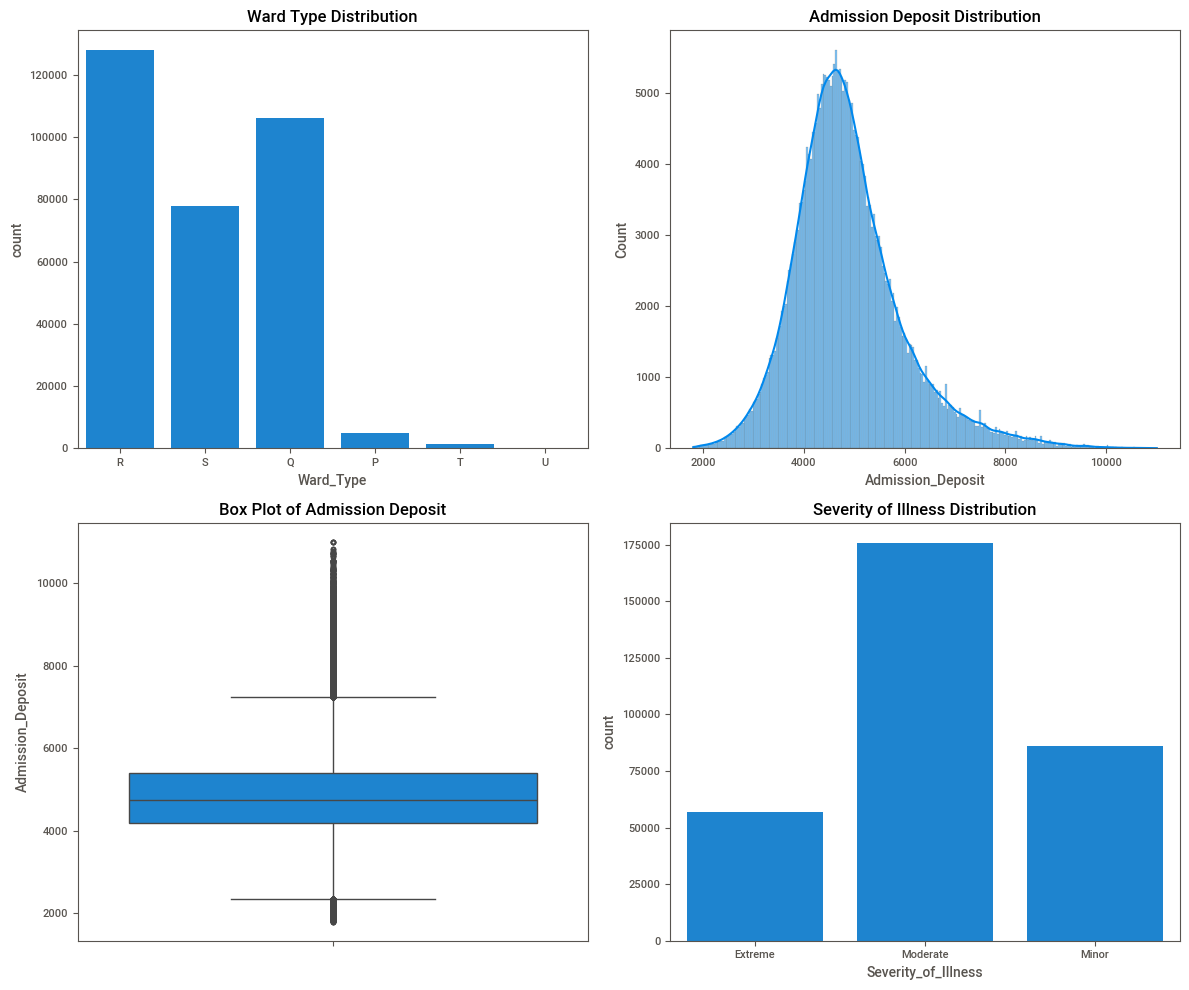

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))  # 2 rows, 2 columns

# Plot 1: Bar plot for categorical variable
sns.countplot(data=df, x='Ward_Type', ax=axes[0, 0])
axes[0, 0].set_title('Ward Type Distribution')

# Plot 2: Histogram for numerical variable
sns.histplot(data=df, x='Admission_Deposit', kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Admission Deposit Distribution')

# Plot 3: Box plot for numerical variable
sns.boxplot(data=df, y='Admission_Deposit', ax=axes[1, 0])
axes[1, 0].set_title('Box Plot of Admission Deposit')

# Plot 4: Bar plot for another categorical variable
sns.countplot(data=df, x='Severity_of_Illness', ax=axes[1, 1])
axes[1, 1].set_title('Severity of Illness Distribution')

# Adjust layout
plt.tight_layout()
plt.show()


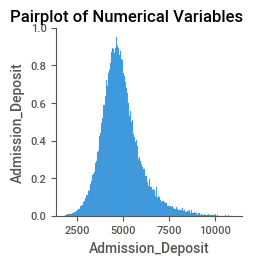

In [29]:
sns.pairplot(df[['Admission_Deposit', 'Age', 'Stay']])
plt.suptitle('Pairplot of Numerical Variables', y=1.02)
plt.show()


In [44]:

Numerical_data=df[["case_id","Hospital_code","City_Code_Hospital","Available_Extra_Rooms_in_Hospital","patientid","Visitors_with_Patient","Admission_Deposit",
         "City_Code_Patient"]]
categorical_data=df[["Hospital_type_code","Hospital_region_code","Department","Ward_Type","Ward_Facility_Code","Type_of_Admission","Severity_of_Illness",
           "Age","Stay","Bed_Grade"]]

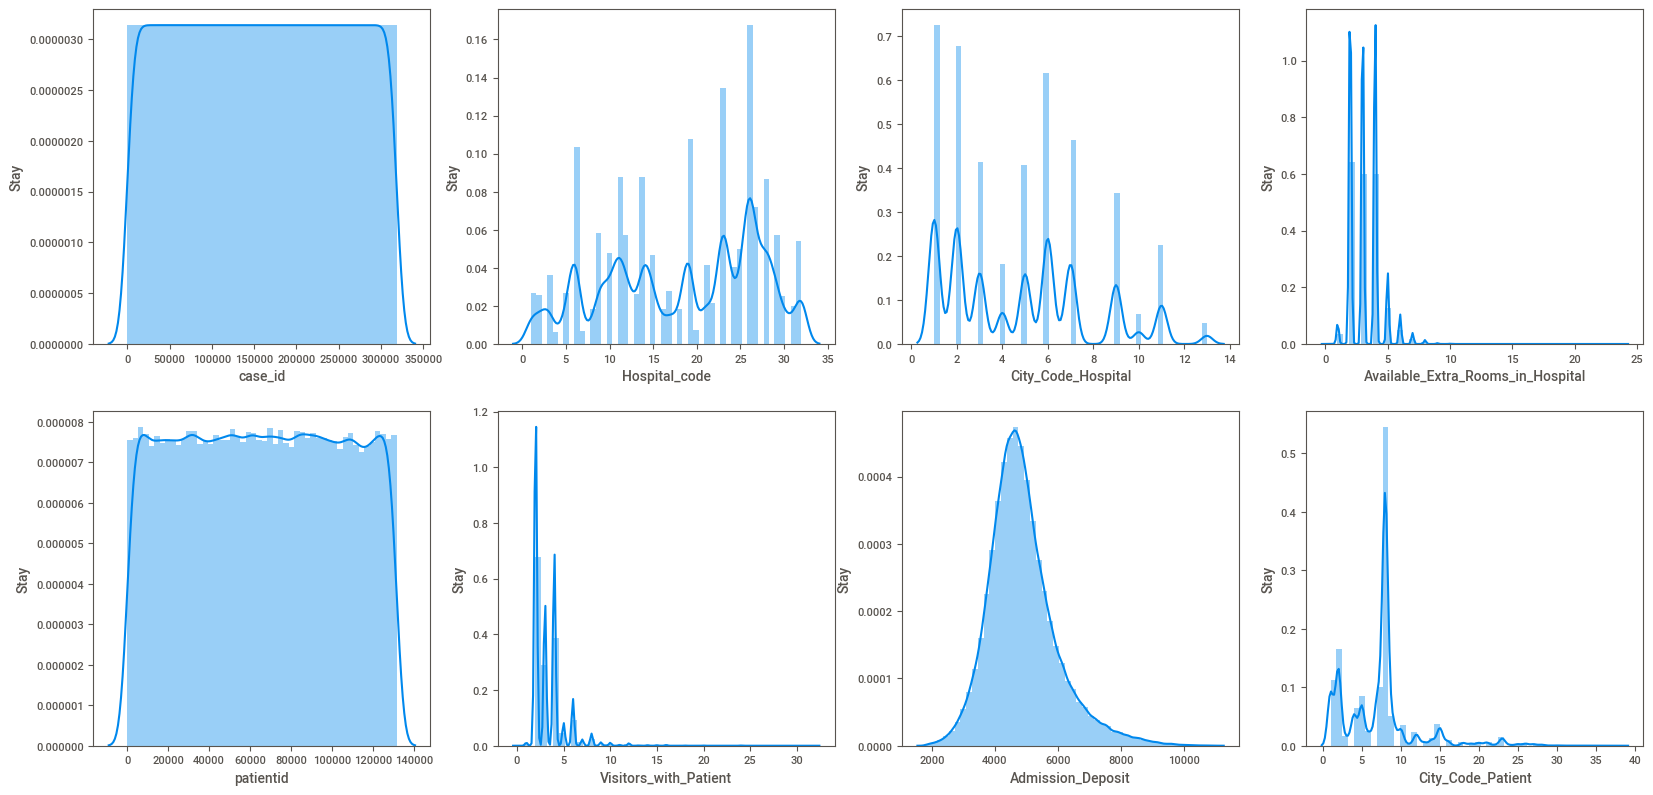

In [31]:
plt.figure(figsize=(20,20))
plotnumber=1

for columns in Numerical_data:
    sb=plt.subplot(4,4,plotnumber)
    sns.distplot(x=Numerical_data[columns])
    plt.xlabel(columns)
    plt.ylabel('Stay')
    plotnumber+=1
plt.tight_layout(pad=100)

Distplot is used for distribution of continous data.

Case Id:-From the above graphs we can tell that case_id is uniform and there is no variation in that columns.

patientid:-From the above displot we can tell that patientid is uniform there is no variation in that columns

Admission_deposit:-From the above displot we can tell that aadmission_deposit shows normal distribution.

Hospital_code:-From the above displot we can tell that it is skewed.

city_code_hospital:-From the above displot we can tell that it is skewed.

Available_extra_rooms_in_hosp:-From the above displot we can tell that it is skewed.

visitors_with_patient:-From the above displot we can tell that the graph is skewed.

city_code_patient:-From the above displot we can tell that it is skewed.

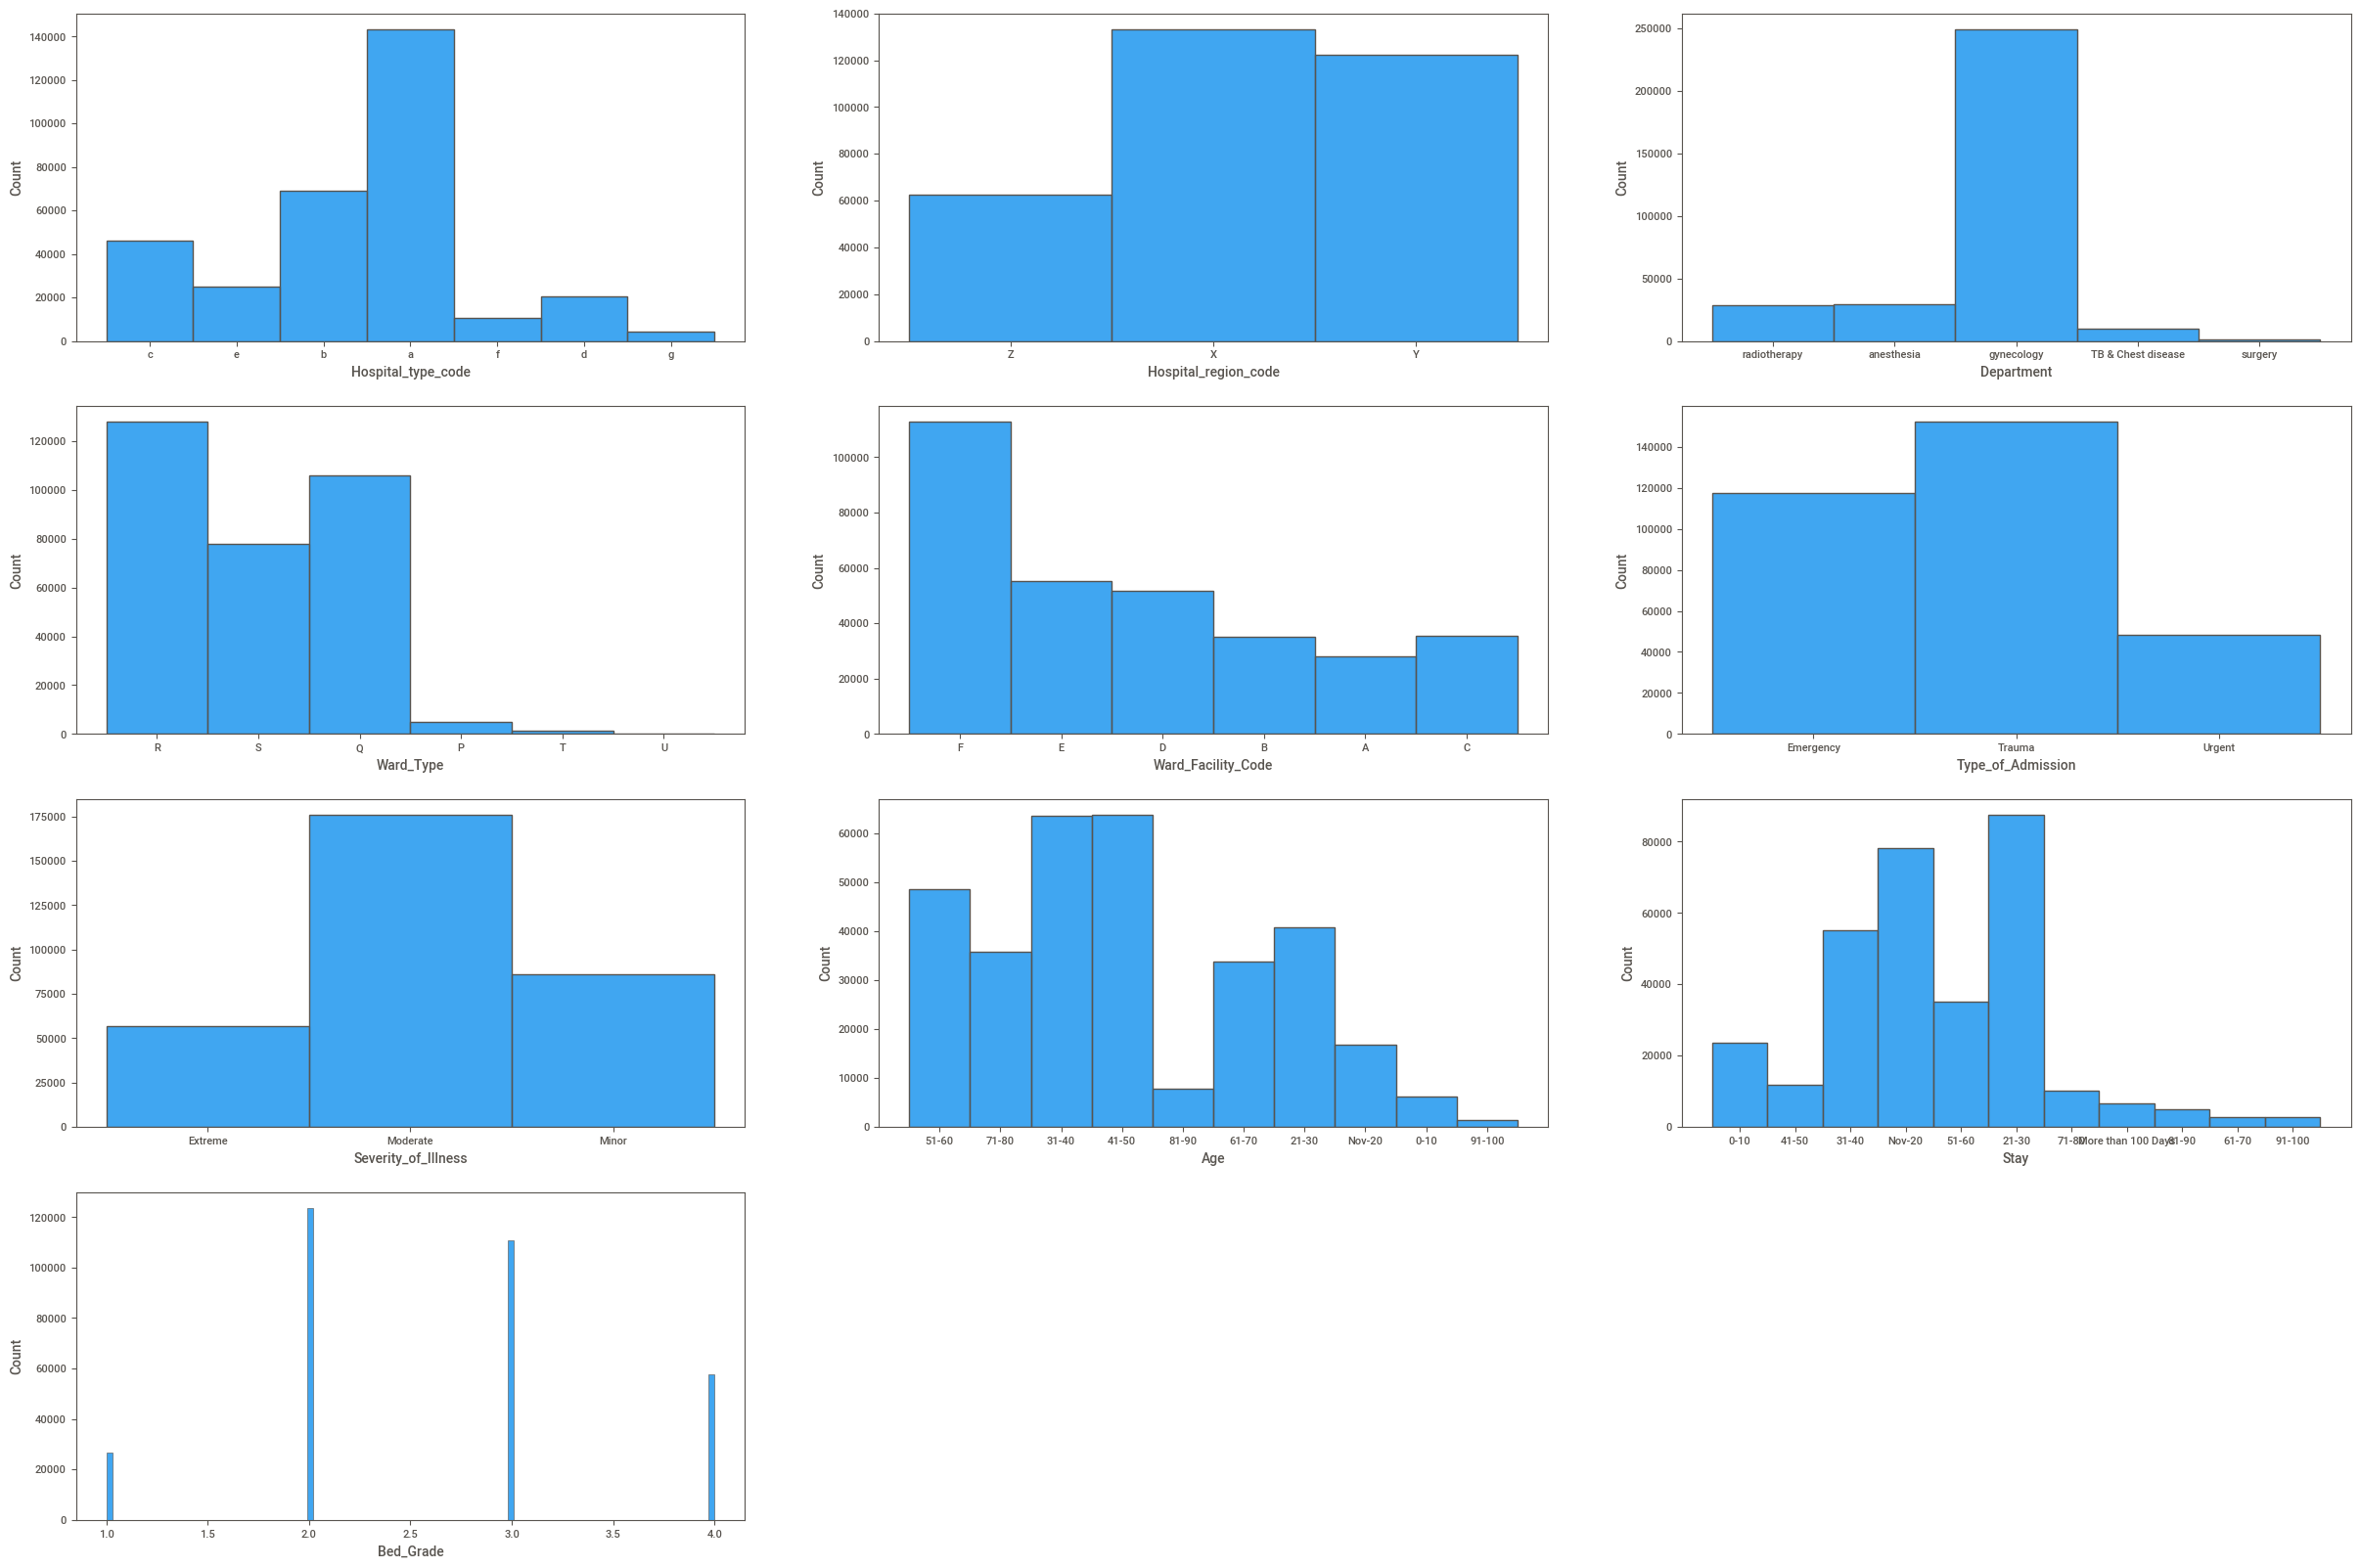

In [33]:
plt.figure(figsize=(30,20))
plotnumber=1

for columns in categorical_data:
    sb=plt.subplot(4,3,plotnumber)
    sns.histplot(x=categorical_data[columns])
    plt.xlabel(columns)
    
    plotnumber+=1
plt.tight_layout(pad=100)

 # Insights


countplot is used for distribution of categorical data.

Hospital_type_code:- In the above countplot there are 6 unique parameters then "a" column has highest count and "g" has lowest count.

Hospital_region_code:-In the above countplot there are 3 unique parameters then "x" column has highest count and "z" has lowest count.

Department:-In the above countplot there are 5 unique parameters then "gynecology" column has highest count and "disease surgery" has lowest count.

Ward_type:-In the above countplot there are 6 unique parameters then "R" column has highest count and "U" has lowest count.

Ward_Facility_Code:-In the above countplot there are 6 unique parameters then "F" column has highest count and "A" has lowest count.

Type_of_Admission:-In the above countplot there are 3 unique parameters then "TRAUMA" column has highest count and "URGENT" has lowest count.

Severity_of_illness:-In the above countplot there are 3 unique parameters then "Moderate" column has highest count and "Extreme" has lowest count.

Age:- In the above countplot there are 10 unique parameters then "41-50" column has highest count and "91-100" has lowest count.

Stay:- In the above countplot there are 10 unique parameters then "21-30" column has more than 8000 range and "61-70" column has lowest range.

Bed_Grade:- In the above countplot there are 4 unique parameters then "20" column has highest count in a range of 120000 and "10" has lowest coun

 # Bivariate Analysis

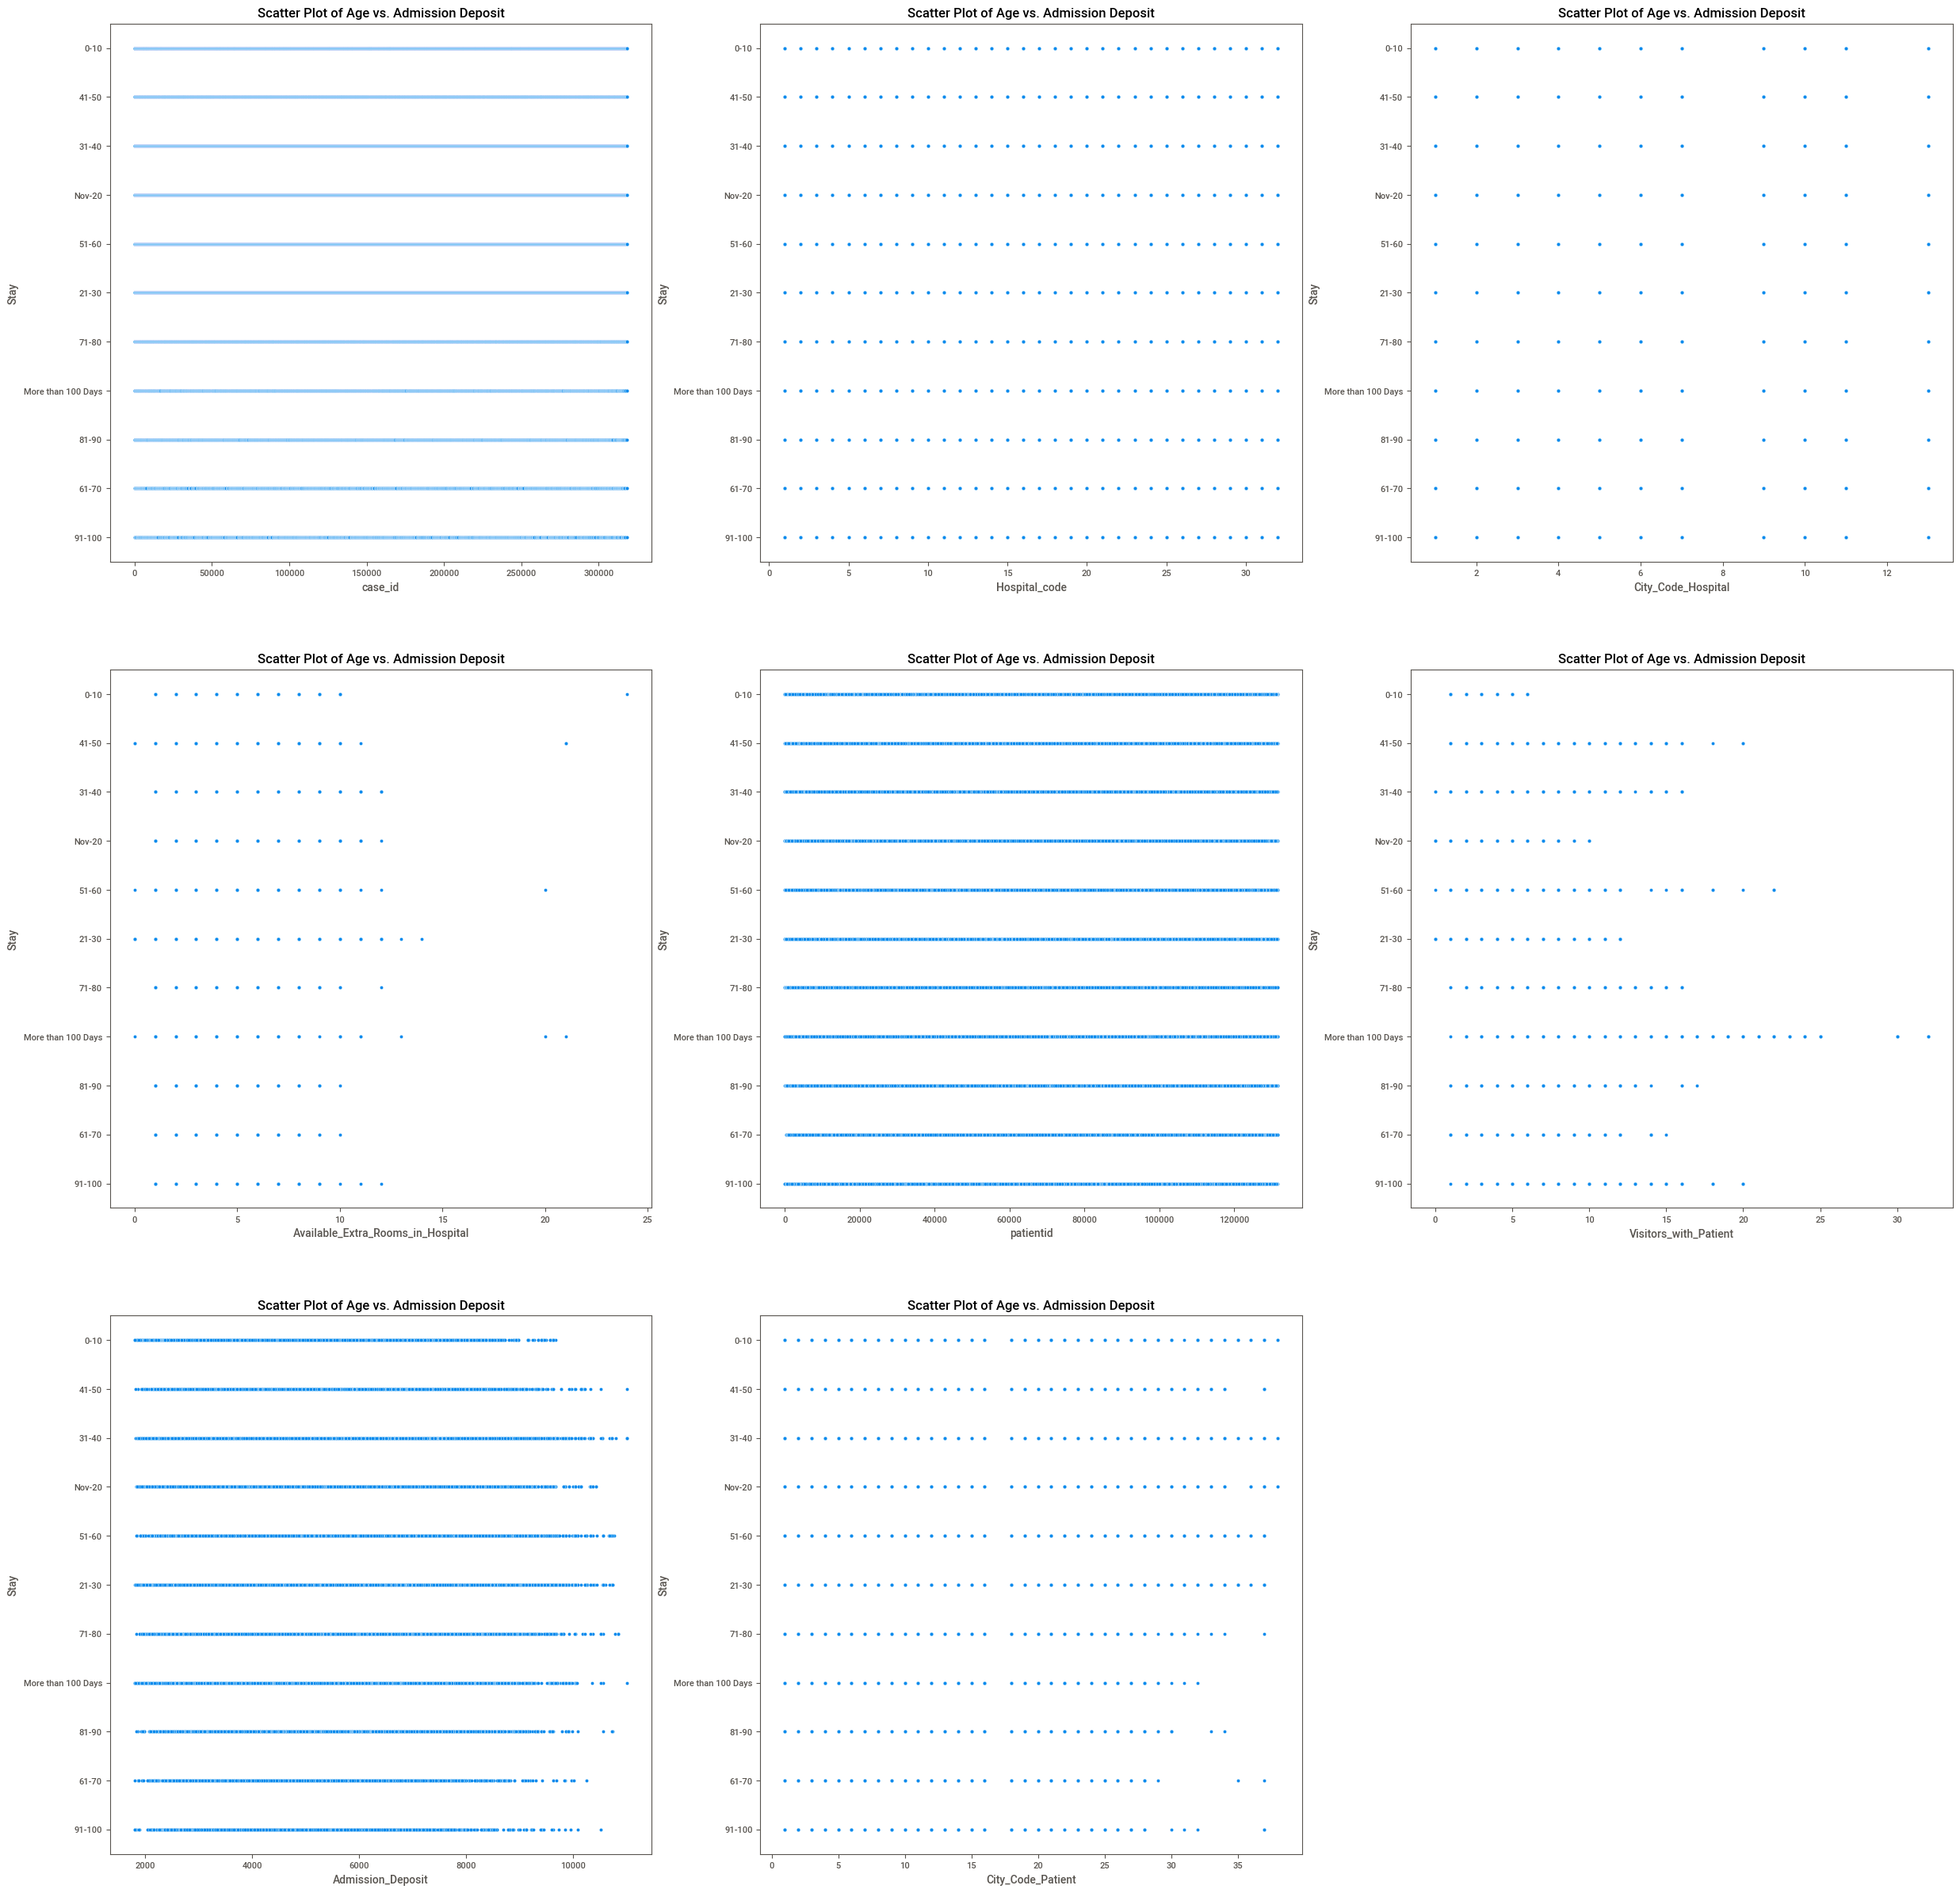

<Figure size 640x480 with 0 Axes>

In [37]:
plt.figure(figsize=(30,30))
plotnumber=1
for i in Numerical_data:
    sb=plt.subplot(3,3,plotnumber)
    sns.scatterplot(data=df, x=Numerical_data[i], y='Stay')
    plt.title('Scatter Plot of Age vs. Admission Deposit')
    
    plotnumber+=1

plt.show()
plt.tight_layout(pad=100)

No much corrlation is been seen

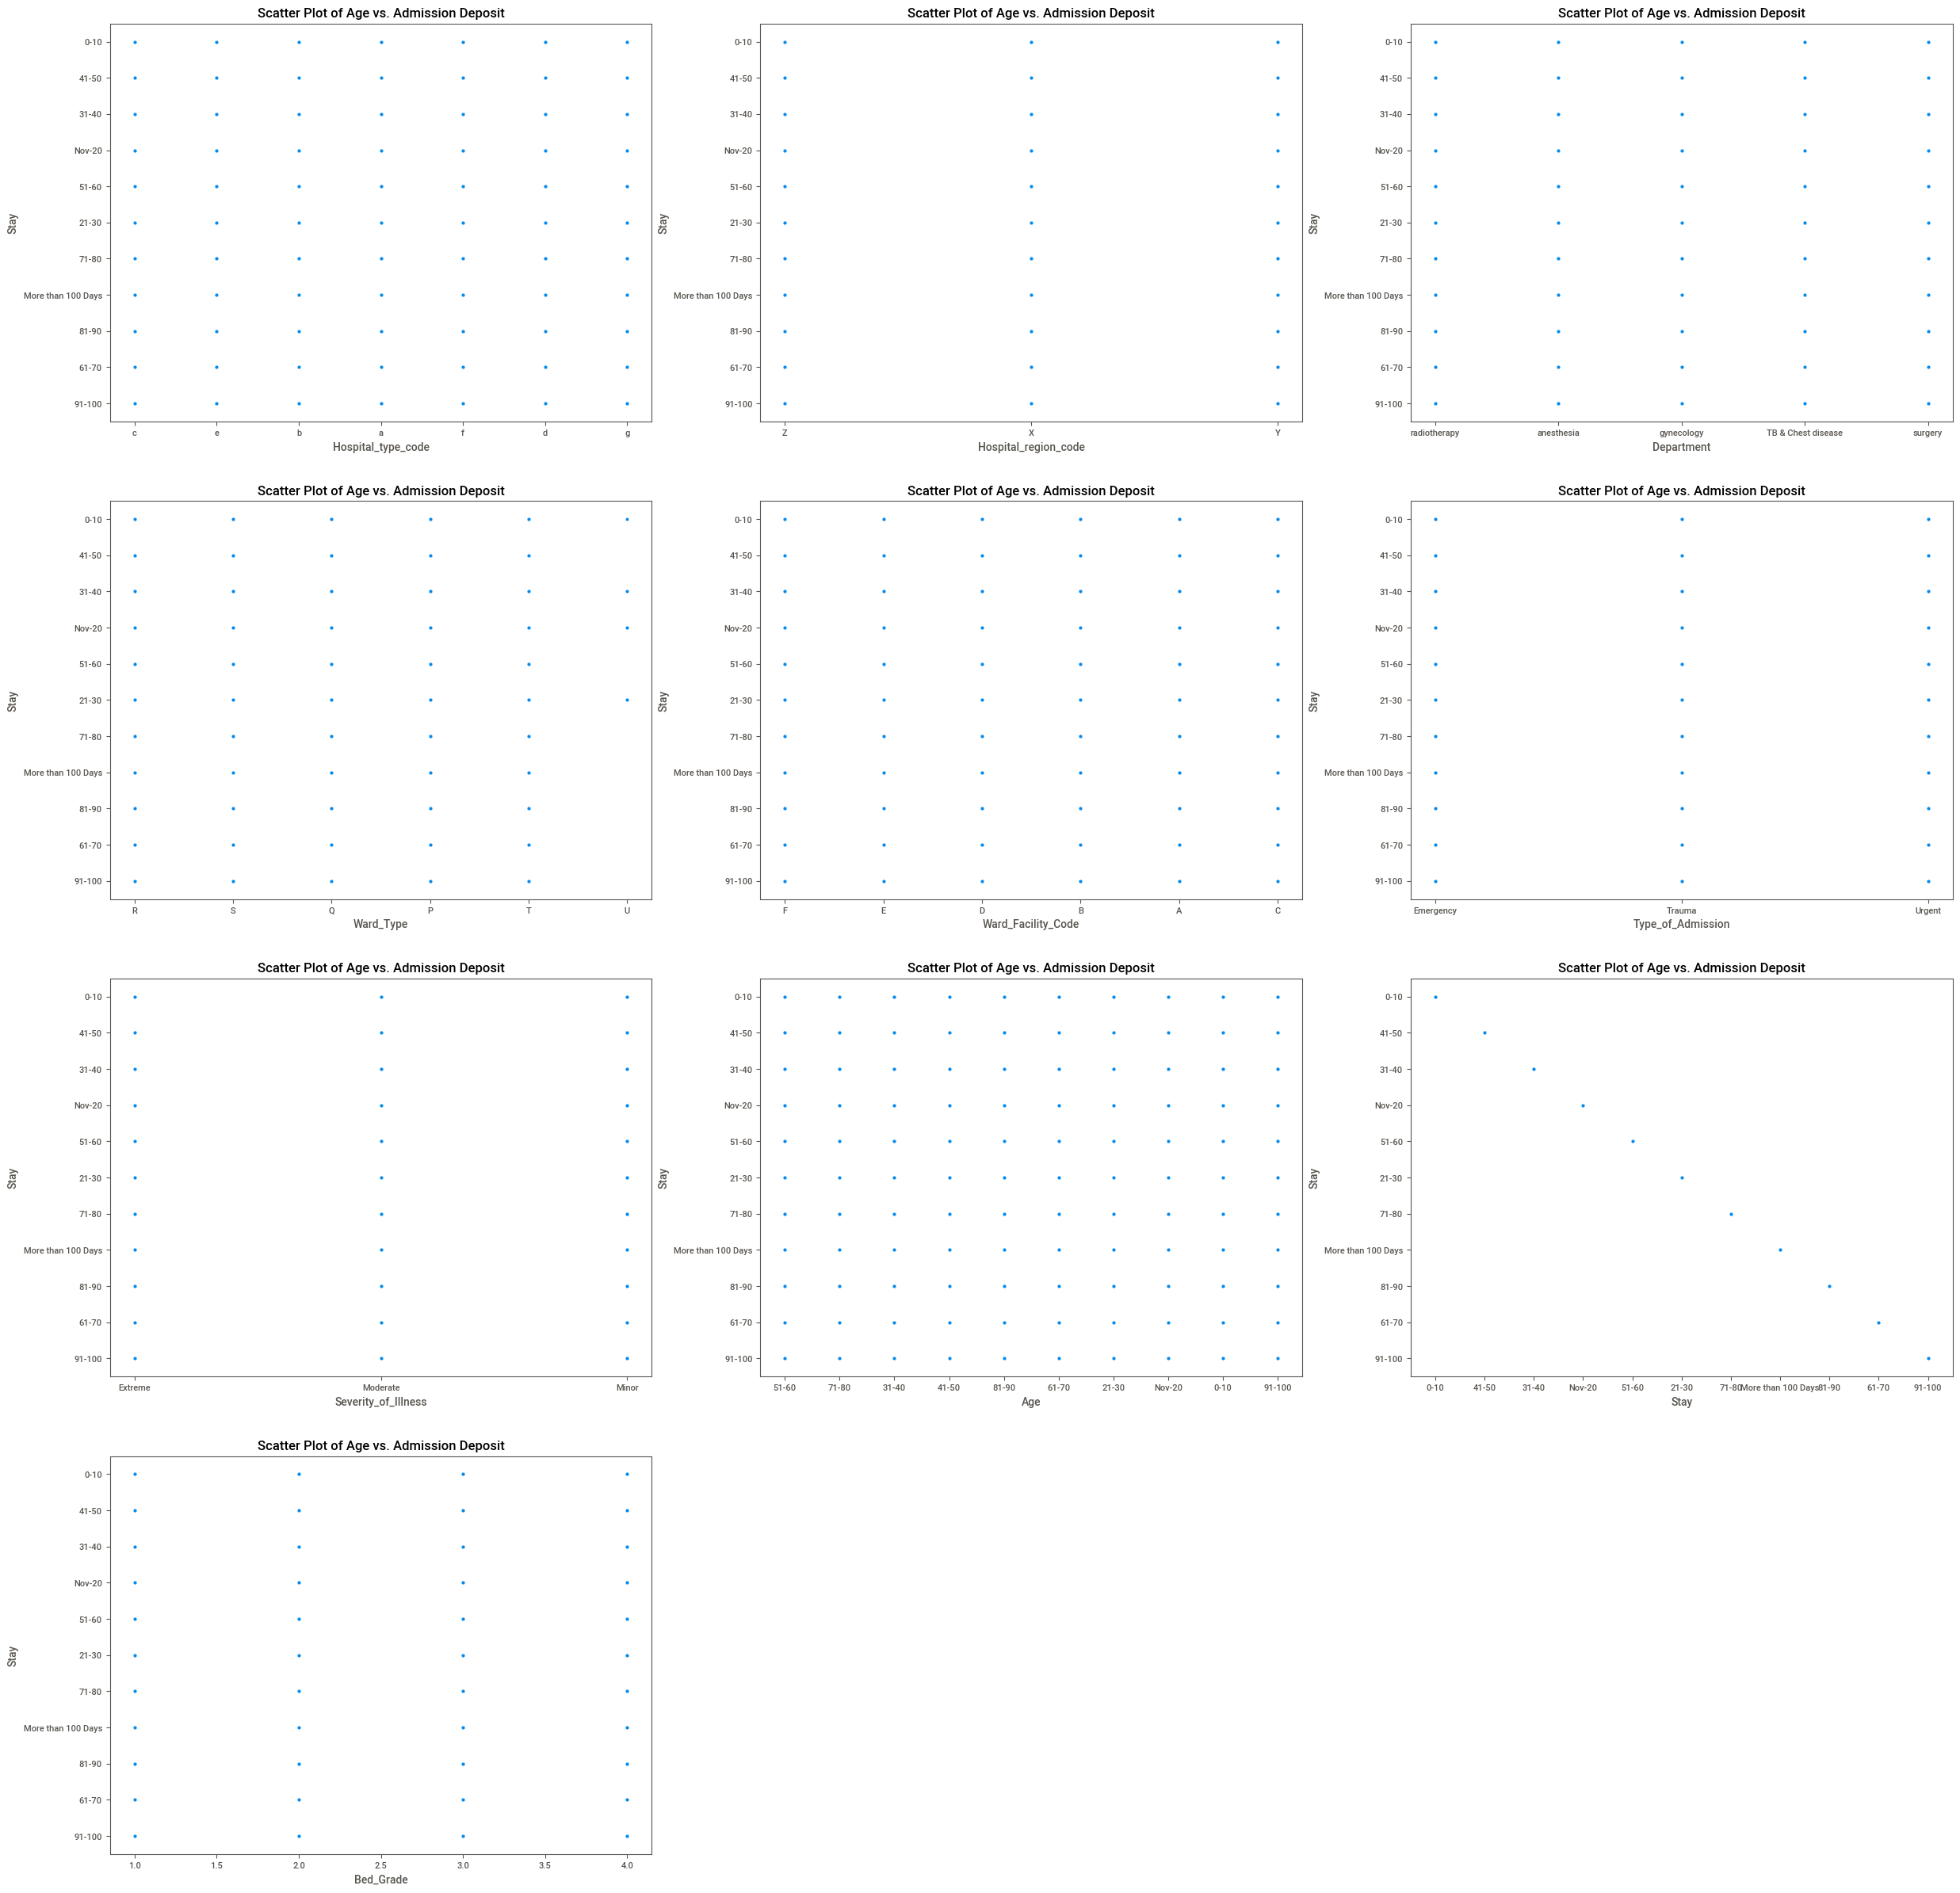

<Figure size 640x480 with 0 Axes>

In [39]:
plt.figure(figsize=(30,30))
plotnumber=1
for i in categorical_data:
    sb=plt.subplot(4,3,plotnumber)
    sns.scatterplot(data=df, x=categorical_data[i], y='Stay')
    plt.title('Scatter Plot of Age vs. Admission Deposit')
    
    plotnumber+=1

plt.show()
plt.tight_layout(pad=100)

In [40]:
'''# Convert Stay and Age to numeric categories for analysis
df['Stay_Days'] = pd.Categorical(df['Stay']).codes
df['Age_Group'] = pd.Categorical(df['Age']).codes

# Create correlation matrix for numeric columns
numeric_cols = ['Hospital_code', 'Available_Extra_Rooms_in_Hospital', 'Bed_Grade', 
                'Visitors_with_Patient', 'Admission_Deposit', 'Stay_Days', 'Age_Group']
correlation_matrix = df[numeric_cols].corr()

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Numeric Variables')
plt.tight_layout()
plt.show()

# Key categorical relationships with Stay
plt.figure(figsize=(12, 6))
sns.boxplot(x='Type_of_Admission', y='Admission_Deposit', data=df)
plt.xticks(rotation=45)
plt.title('Admission Deposit by Type of Admission')
plt.tight_layout()
plt.show()

# Department vs Stay
plt.figure(figsize=(12, 6))
sns.boxplot(x='Department', y='Stay_Days', data=df)
plt.xticks(rotation=90)
plt.title('Length of Stay by Department')
plt.tight_layout()
plt.show()

# Calculate chi-square test for categorical variables
from scipy.stats import chi2_contingency

# Create contingency table
contingency = pd.crosstab(df['Type_of_Admission'], df['Severity_of_Illness'])
chi2, p_value, dof, expected = chi2_contingency(contingency)
print("\
Chi-square test results for Type_of_Admission vs Severity_of_Illness:")
print("Chi-square statistic:", chi2)
print("p-value:", p_value)'''

'# Convert Stay and Age to numeric categories for analysis\ndf[\'Stay_Days\'] = pd.Categorical(df[\'Stay\']).codes\ndf[\'Age_Group\'] = pd.Categorical(df[\'Age\']).codes\n\n# Create correlation matrix for numeric columns\nnumeric_cols = [\'Hospital_code\', \'Available_Extra_Rooms_in_Hospital\', \'Bed_Grade\', \n                \'Visitors_with_Patient\', \'Admission_Deposit\', \'Stay_Days\', \'Age_Group\']\ncorrelation_matrix = df[numeric_cols].corr()\n\n# Plot correlation heatmap\nplt.figure(figsize=(10, 8))\nsns.heatmap(correlation_matrix, annot=True, cmap=\'coolwarm\', center=0)\nplt.title(\'Correlation Heatmap of Numeric Variables\')\nplt.tight_layout()\nplt.show()\n\n# Key categorical relationships with Stay\nplt.figure(figsize=(12, 6))\nsns.boxplot(x=\'Type_of_Admission\', y=\'Admission_Deposit\', data=df)\nplt.xticks(rotation=45)\nplt.title(\'Admission Deposit by Type of Admission\')\nplt.tight_layout()\nplt.show()\n\n# Department vs Stay\nplt.figure(figsize=(12, 6))\nsns.boxplot

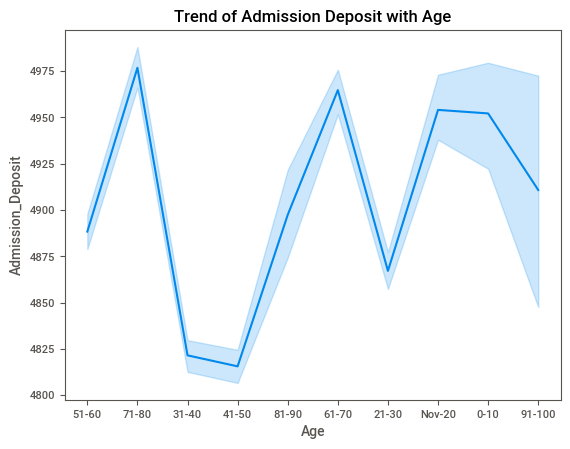

In [41]:
sns.lineplot(data=df, x='Age', y='Admission_Deposit')
plt.title('Trend of Admission Deposit with Age')
plt.show()


In [42]:
data =df

ANOVA Test Results for Stay Duration across Departments:
F-statistic: 133.5715304541345
p-value: 3.207058467311008e-114
Chi-square Test Results for Severity vs Admission Type:
Chi-square statistic: 1269.4948250015698
p-value: 1.3676845778788875e-273


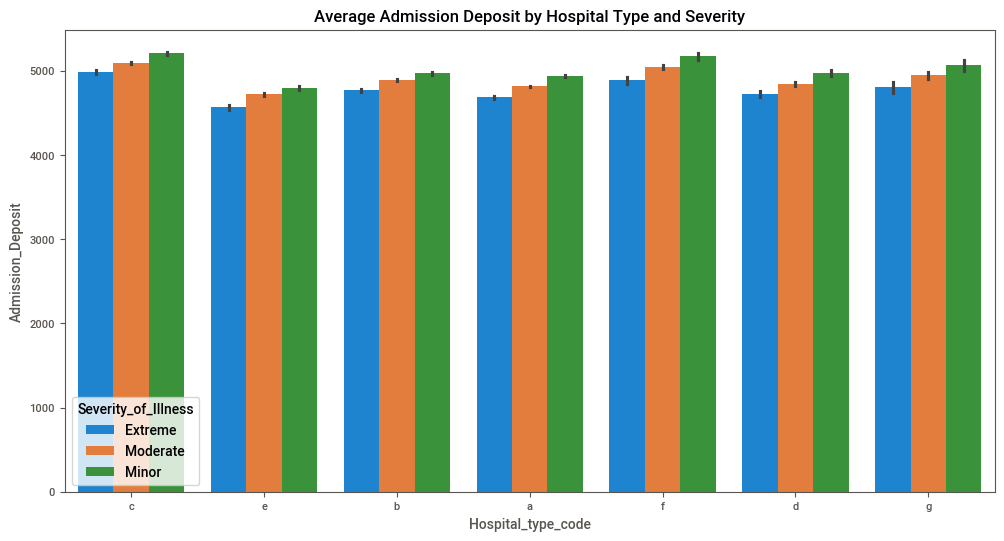

In [43]:
# 1. Advanced Stay Analysis
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Convert Stay categories to numeric for analysis
stay_order = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100', 'More than 100']
data['Stay_Numeric'] = pd.Categorical(data['Stay'], categories=stay_order, ordered=True).codes

# Stay duration by severity and admission type

# ANOVA test for Stay duration across departments
departments = data['Department'].unique()
stay_by_dept = [data[data['Department'] == dept]['Stay_Numeric'] for dept in departments]
f_stat, p_val = stats.f_oneway(*stay_by_dept)
print("\
ANOVA Test Results for Stay Duration across Departments:")
print(f"F-statistic: {f_stat}")
print(f"p-value: {p_val}")

# Chi-square test for Severity and Admission Type
contingency = pd.crosstab(data['Severity_of_Illness'], data['Type_of_Admission'])
chi2, p_val, dof, expected = stats.chi2_contingency(contingency)
print("\
Chi-square Test Results for Severity vs Admission Type:")
print(f"Chi-square statistic: {chi2}")
print(f"p-value: {p_val}")

# Average admission deposit by hospital type and severity
plt.figure(figsize=(12, 6))
sns.barplot(x='Hospital_type_code', y='Admission_Deposit', hue='Severity_of_Illness', data=data)
plt.title('Average Admission Deposit by Hospital Type and Severity')
plt.xticks(rotation=0)
plt.show()

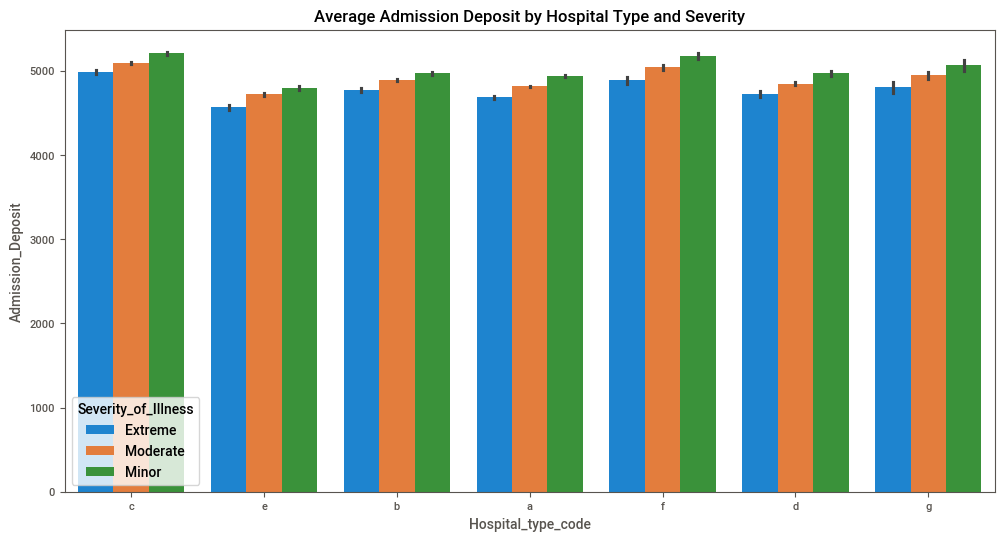

In [44]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Hospital_type_code', y='Admission_Deposit', hue='Severity_of_Illness', data=data)
plt.title('Average Admission Deposit by Hospital Type and Severity')
plt.xticks(rotation=0)
plt.show()


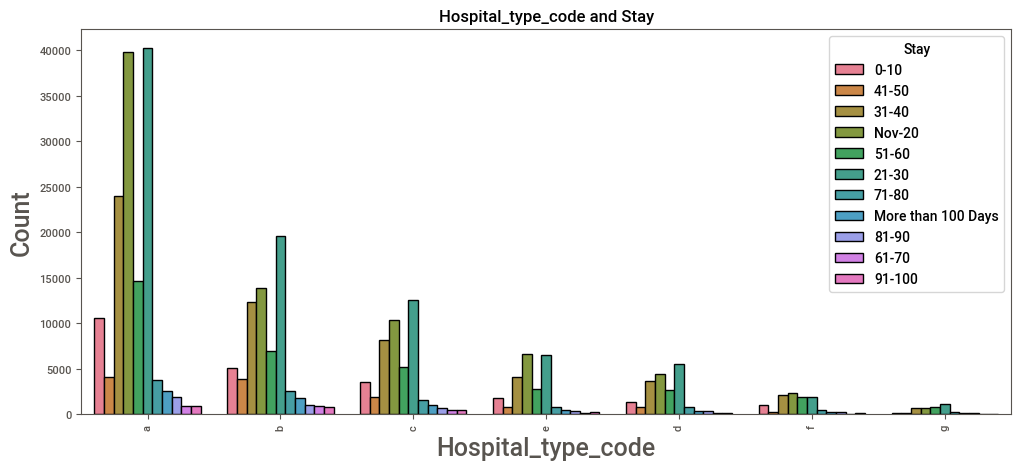

In [45]:
data=df
plt.figure(figsize=(12,5))
sns.countplot(x="Hospital_type_code",data=data,hue=data["Stay"],order=data["Hospital_type_code"].value_counts().index,ec="black")
plt.title("Hospital_type_code and Stay",color='black')
plt.xlabel("Hospital_type_code",fontsize=18)
plt.xticks(rotation=90)
plt.ylabel("Count",fontsize=18)
plt.show()

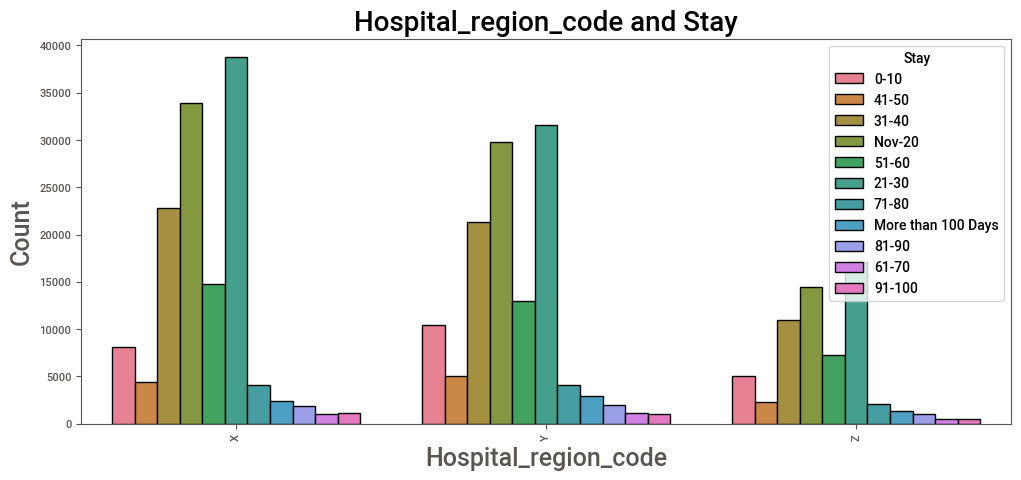

In [46]:
plt.figure(figsize=(12,5))
sns.countplot(x="Hospital_region_code",data=data,hue=data["Stay"],order=data["Hospital_region_code"].value_counts().index,ec="black")
plt.title("Hospital_region_code and Stay", fontsize=20, color='black')
plt.xlabel("Hospital_region_code",fontsize=18)
plt.xticks(rotation=90)
plt.ylabel("Count",fontsize=18)
plt.show()


Insights
Above plot showing Hospital_region_code in 3 unique value is there x,y,z
In X most of patient will stay up to 71-80 days totaly 38000 near and and least 61-70 days totaly 2000
In Y most of patient will stay up to 71-80 totaly 30000 patients and least 61-70 days 2000 patient

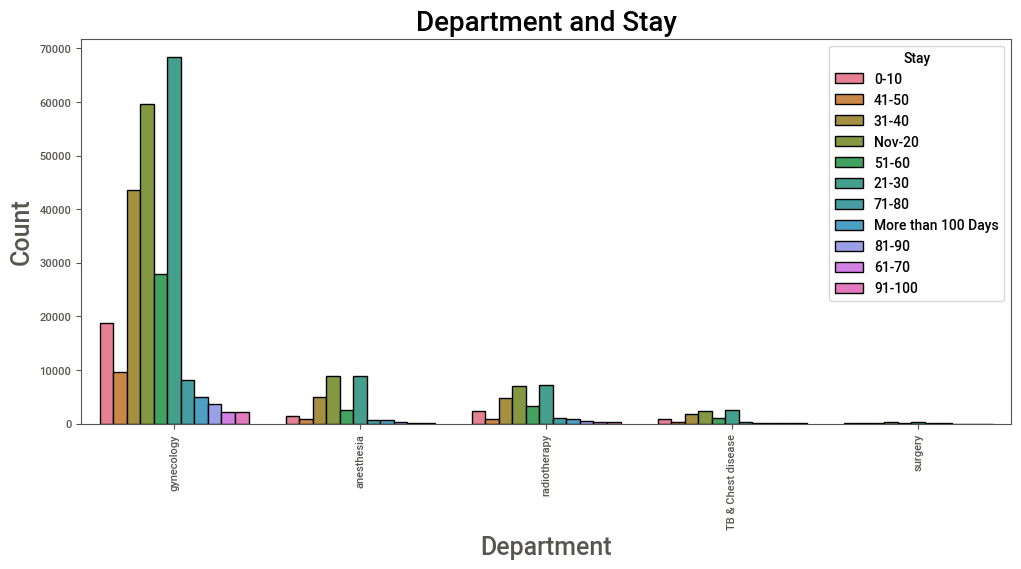

In [48]:
plt.figure(figsize=(12,5))
sns.countplot(x="Department",data=data,hue=data["Stay"],order=data["Department"].value_counts().index,ec="black")
plt.title("Department and Stay", fontsize=20, color='black')
plt.xlabel("Department",fontsize=18)
plt.xticks(rotation=90)
plt.ylabel("Count",fontsize=18)
plt.show()

Insights
Above visualization we got 'gynecology' has highest count 68000 patients will saty 21-30 days fallowed by 'anesthesia'
Lowest is 'surgery',surgery patients are very less counts means less then 100 patient will stay

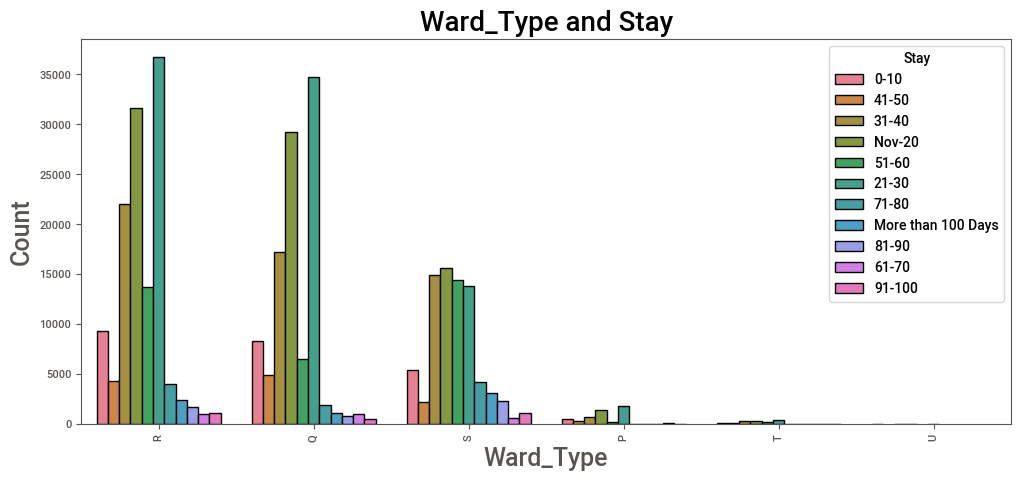

In [50]:
plt.figure(figsize=(12,5))
sns.countplot(x="Ward_Type",data=data,hue=data["Stay"],order=data["Ward_Type"].value_counts().index,ec="black")
plt.title("Ward_Type and Stay", fontsize=20, color='black')
plt.xlabel("Ward_Type",fontsize=18)
plt.xticks(rotation=90)
plt.ylabel("Count",fontsize=18)
plt.show()


Insights
We have 6 type of Wards in that 'R' has highest patients stays in that maximum 21-30 days above 35000 patients will stay fallowed by 'Q'
least count is 'U' ward, it has very less patient stay means 10

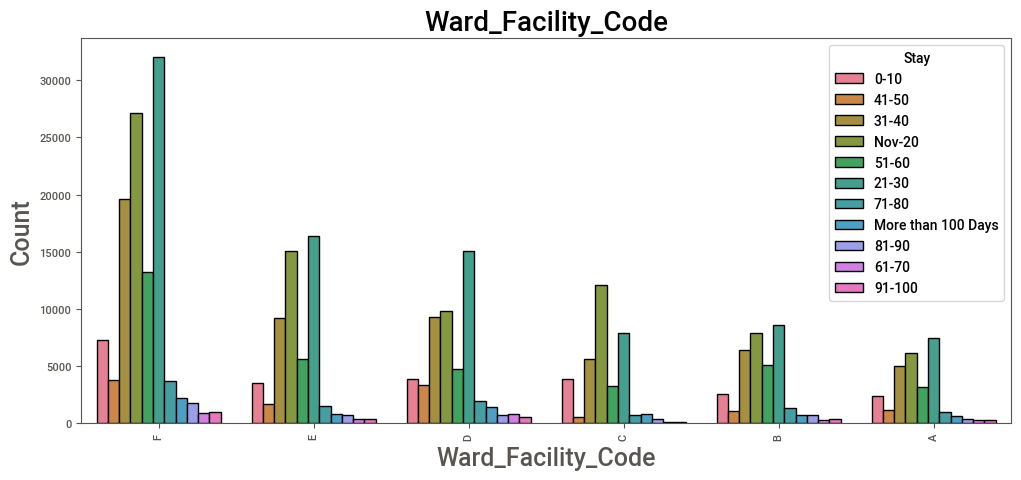

In [52]:
plt.figure(figsize=(12,5))
sns.countplot(x="Ward_Facility_Code",data=data,hue=data["Stay"],order=data["Ward_Facility_Code"].value_counts().index,ec="black")
plt.title("Ward_Facility_Code", fontsize=20, color='black')
plt.xlabel("Ward_Facility_Code",fontsize=18)
plt.xticks(rotation=90)
plt.ylabel("Count",fontsize=18)
plt.show()

In ward_Facility_code there are 6 values in taht 'F' has highest and above 35000 patients will stay 21-30 days fallowed by 'E'
least count is 'A' that has only 5000 patient will stay 21-30 day

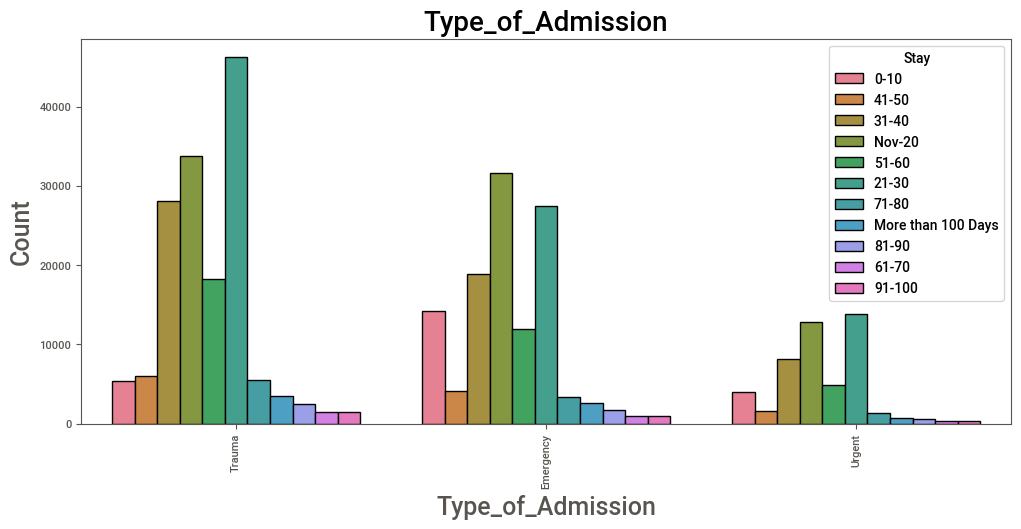

In [54]:
plt.figure(figsize=(12,5))
sns.countplot(x="Type_of_Admission",data=data,hue=data["Stay"],order=data["Type_of_Admission"].value_counts().index,ec="black")
plt.title("Type_of_Admission", fontsize=20, color='black')
plt.xlabel("Type_of_Admission",fontsize=18)
plt.xticks(rotation=90)
plt.ylabel("Count",fontsize=18)
plt.show()

In Type_of_Admission has 3 unique value 'Trauma','Emergency' and 'urgent'

highest patient will stay in Trauma with different days ,in that 21-30 is highest patient

Followed by 'Emergency'

least Admission is 'Urgen

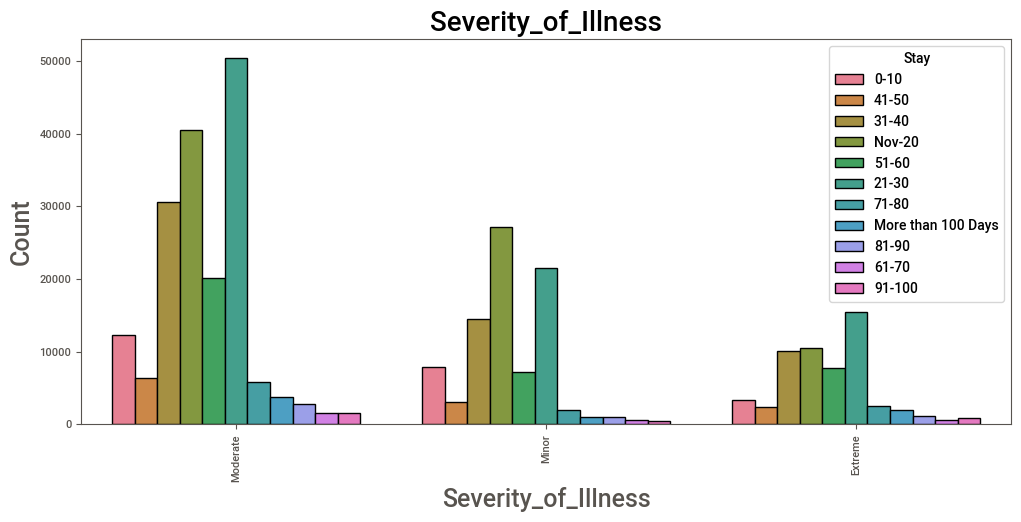

In [56]:

plt.figure(figsize=(12,5))
sns.countplot(x="Severity_of_Illness",data=data,hue=data["Stay"],order=data["Severity_of_Illness"].value_counts().index,ec="black")
plt.title("Severity_of_Illness", fontsize=20, color='black')
plt.xlabel("Severity_of_Illness",fontsize=18)
plt.xticks(rotation=90)
plt.ylabel("Count",fontsize=18)
plt.show()

'Severity_of_illness' has 3 unique value ,'Moderate','Minor','Extreme'

In that 'Moderate' has highest patients will stay within 21-30 days counts is 50000

Least count is 'Excreme' with only 21-30 days 15000 patients will saty

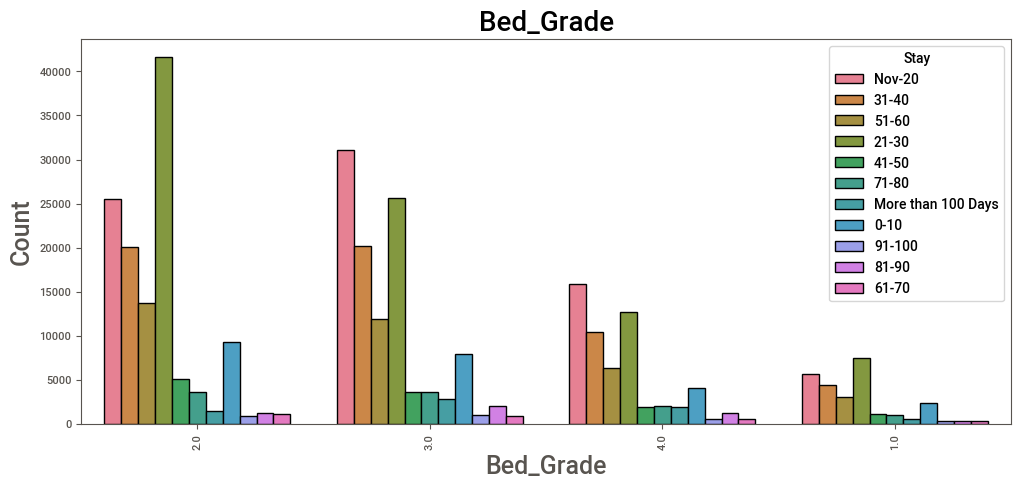

In [58]:
plt.figure(figsize=(12,5))
sns.countplot(x="Bed_Grade",data=data,hue=data["Stay"],order=data["Bed_Grade"].value_counts().index,ec="black")
plt.title("Bed_Grade", fontsize=20, color='black')
plt.xlabel("Bed_Grade",fontsize=18)
plt.xticks(rotation=90)
plt.ylabel("Count",fontsize=18)
plt.show()

The count plot illustrates the distribution of patients' stays across different bed grades. It appears that certain bed grades are more commonly associated with longer stays than others. By observing the height of the bars for each bed grade category, we can discern the relative frequency of different stay durations within each grade. This insight could potentially inform hospital management decisions, such as resource allocation or patient prioritization strategies, based on bed grade assignments. Additionally, the ordering of bed grades provides insight into their popularity or utilization within the hospital, with the most frequently assigned grades appearing first.

'from sklearn.preprocessing import StandardScaler, PowerTransformer\n\n# 1. Create interaction terms (e.g., Severity * Admission_Deposit)\ndata[\'Severity_Deposit_Interaction\'] = data[\'Severity_of_Illness\'] * data[\'Admission_Deposit\']\n\n# 2. Log transformation for skewed numerical variables\nskewed_cols = [\'Admission_Deposit\']\nfor col in skewed_cols:\n    data[col + \'_log\'] = np.log1p(data[col])\n\n# 3. Scaling numerical variables\nscaler = StandardScaler()\nnumeric_cols = data.select_dtypes(include=[\'int64\', \'float64\']).columns\nscaled_features = scaler.fit_transform(data[numeric_cols])\ndata_scaled = pd.DataFrame(scaled_features, columns=numeric_cols)\n\n# 4. Encoding categorical variables (if not already encoded)\nfor col in categorical_cols:\n    if col not in data.columns:\n        le = LabelEncoder()\n        data[col] = le.fit_transform(data[col])\n\n# 5. Feature selection: Drop less relevant features (e.g., redundant or low-importance features)\ndata = data.drop(

In [61]:
data.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available_Extra_Rooms_in_Hospital,Department,Ward_Type,Ward_Facility_Code,Bed_Grade,patientid,City_Code_Patient,Type_of_Admission,Severity_of_Illness,Visitors_with_Patient,Age,Admission_Deposit,Stay,Stay_Numeric
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911,0-10,0
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954,41-50,4
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745,31-40,3
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272,41-50,4
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558,41-50,4


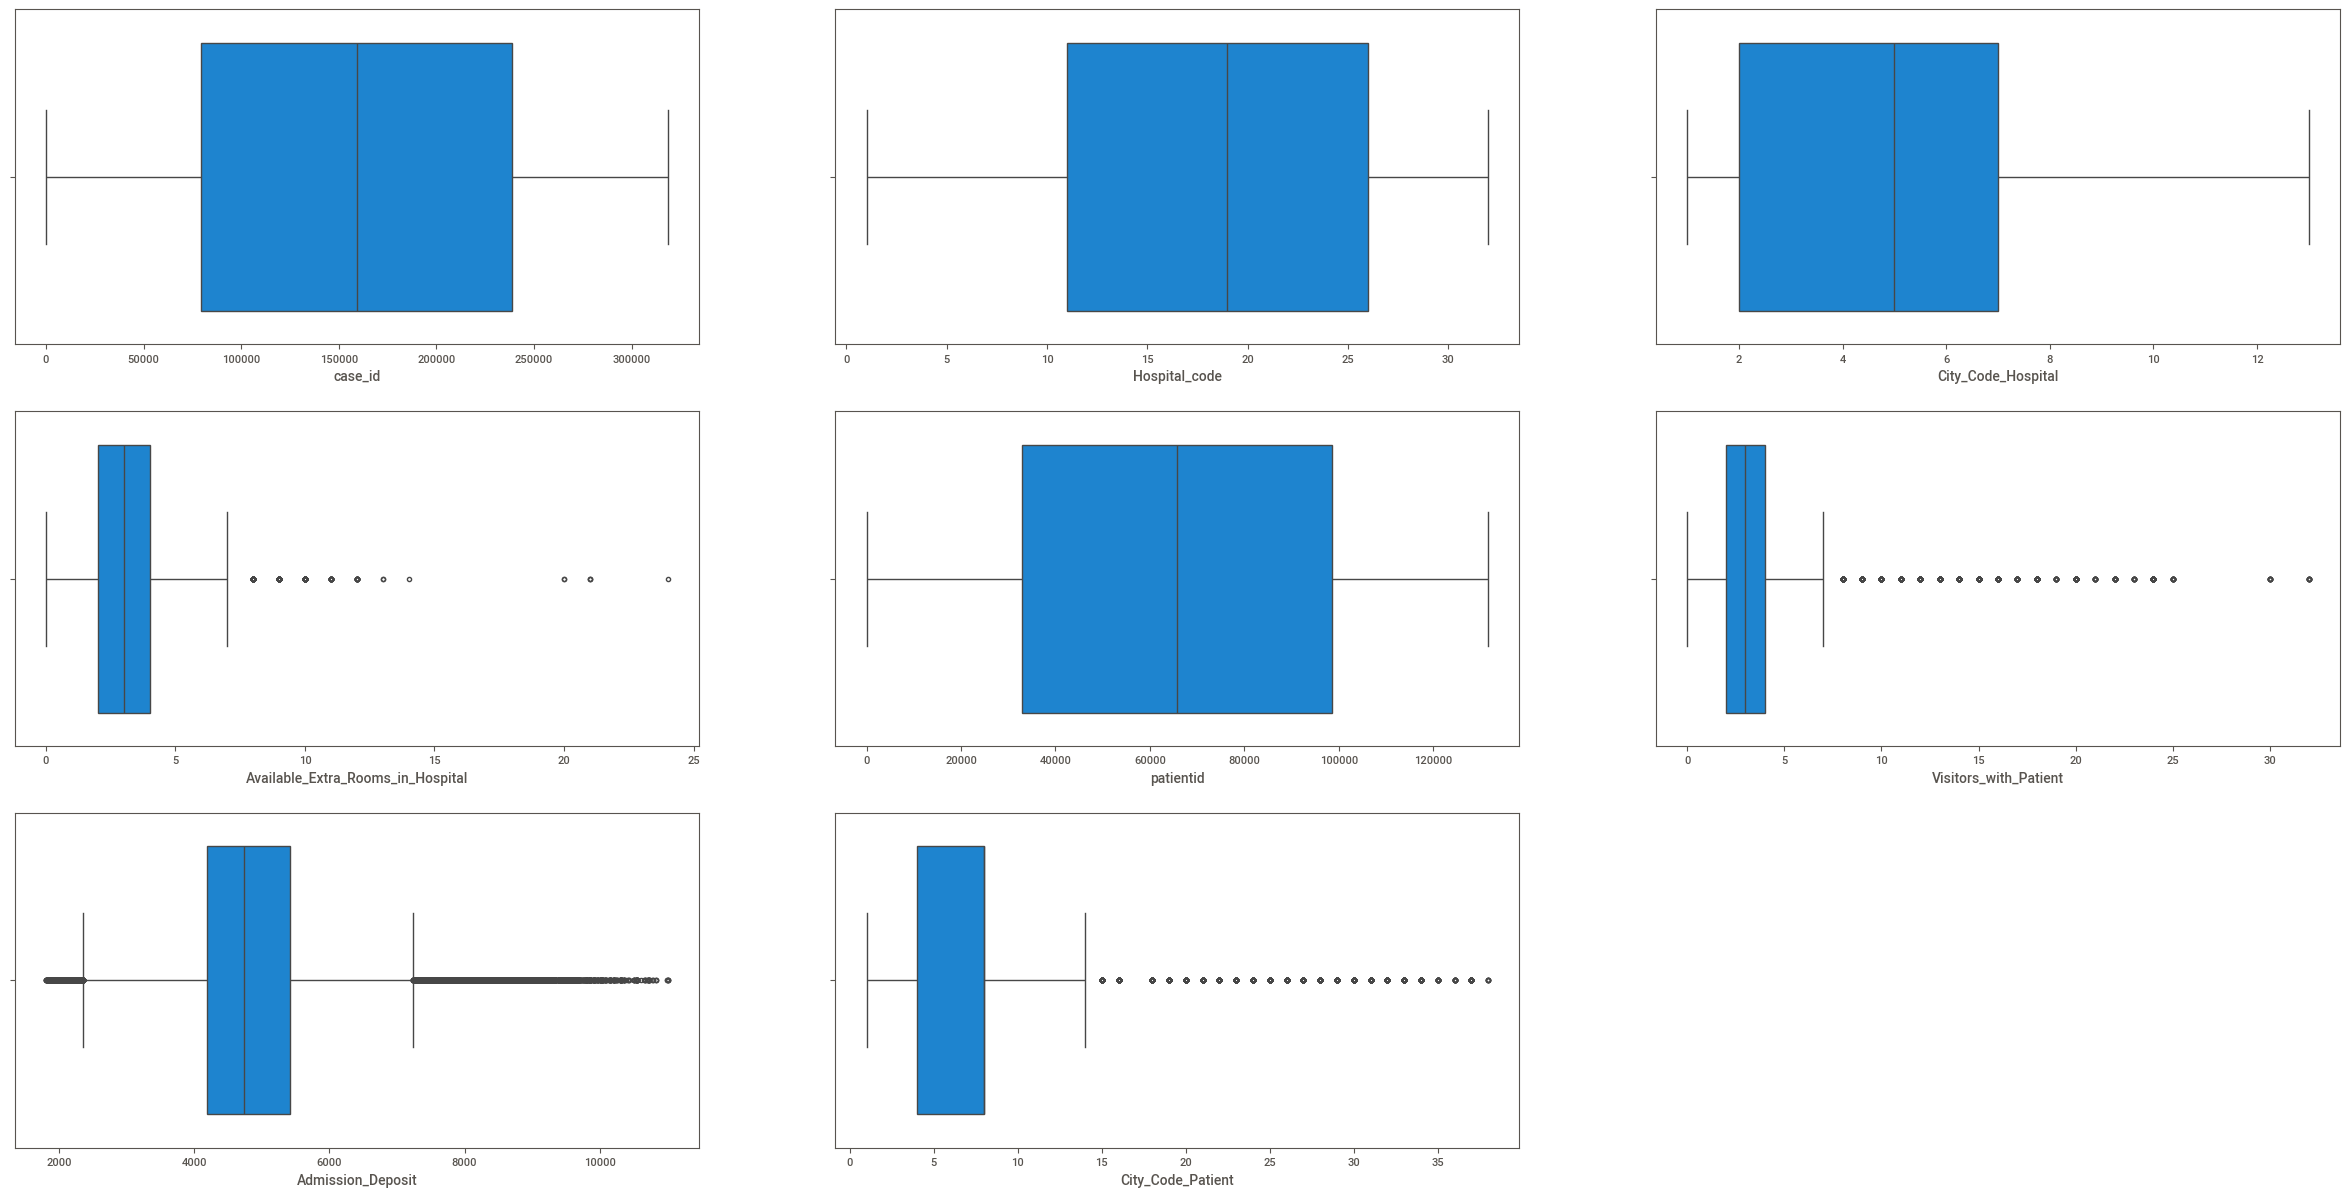

In [62]:
plt.figure(figsize=(30,20))
plotnumber=1

for columns in Numerical_data:
    sb=plt.subplot(4,3,plotnumber)
    sns.boxplot(data= df ,x=Numerical_data[columns])
    plt.xlabel(columns)
    
    plotnumber+=1
plt.tight_layout(pad=100)

# Outlier Detection and Removal using multiple methods
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Function to detect outliers using IQR method
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]
    return outliers, lower_bound, upper_bound

# Function to detect outliers using Z-score method
def detect_outliers_zscore(df, column, threshold=3):
    z_scores = np.abs(stats.zscore(df[column]))
    outliers = df[z_scores > threshold][column]
    return outliers

# Select numerical columns for outlier detection
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns
numerical_cols = [col for col in numerical_cols if col != 'Stay_Numeric']  # Exclude target variable

# Plot boxplots before outlier removal
plt.figure(figsize=(15, 5))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(1, len(numerical_cols), i)
    sns.boxplot(y=data[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

# Print summary of outliers using both methods
print("\
Outlier Detection Summary:")
for column in numerical_cols:
    outliers_iqr, lower, upper = detect_outliers_iqr(data, column)
    outliers_zscore = detect_outliers_zscore(data, column)
    
    print(f"\
Column: {column}")
    print(f"IQR method outliers count: {len(outliers_iqr)}")
    print(f"Z-score method outliers count: {len(outliers_zscore)}")
    print(f"IQR bounds: [{lower:.2f}, {upper:.2f}]")

# Create copy of data for outlier removal
data_clean = data.copy()

# Remove outliers using IQR method (more conservative approach)
for column in numerical_cols:
    outliers_iqr, lower, upper = detect_outliers_iqr(data_clean, column)
    data_clean = data_clean[(data_clean[column] >= lower) & (data_clean[column] <= upper)]

# Plot boxplots after outlier removal
plt.figure(figsize=(15, 5))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(1, len(numerical_cols), i)
    sns.boxplot(y=data_clean[col])
    plt.title(f'Boxplot of {col} (After Outlier Removal)')
plt.tight_layout()
plt.show()

# Print summary statistics before and after outlier removal
print("\
Dataset shape before outlier removal:", data.shape)
print("Dataset shape after outlier removal:", data_clean.shape)

print("\
Summary Statistics Before Outlier Removal:")
print(data[numerical_cols].describe())

print("\
Summary Statistics After Outlier Removal:")
print(data_clean[numerical_cols].describe())

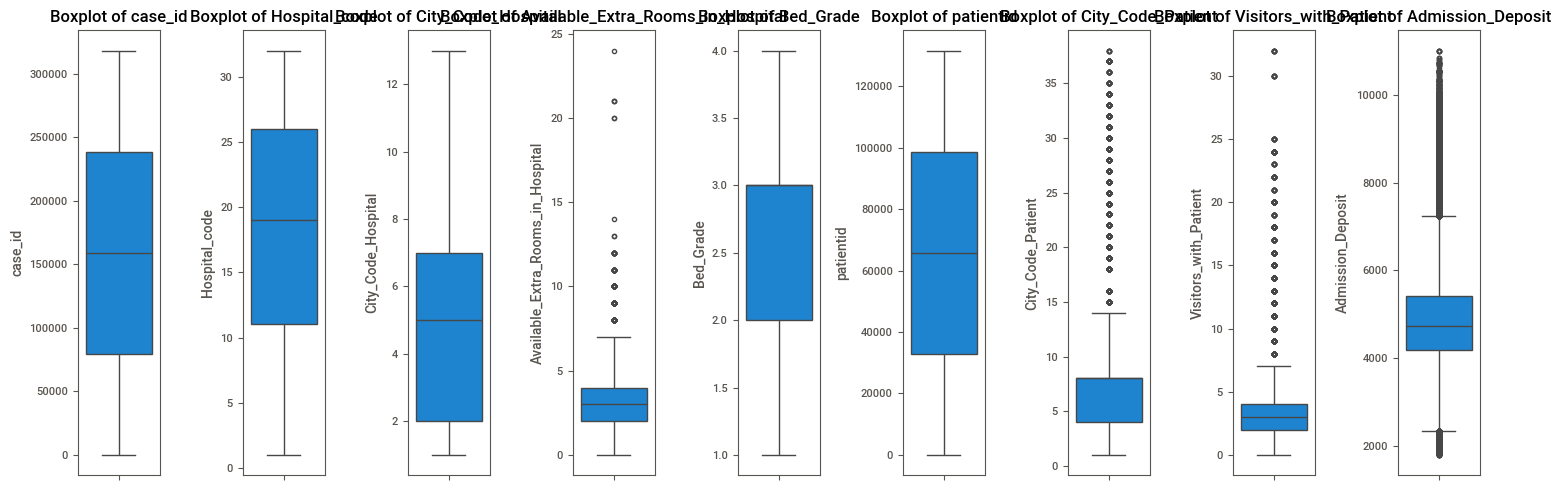

In [64]:
# Plot boxplots before outlier removal
plt.figure(figsize=(15, 5))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(1, len(numerical_cols), i)
    sns.boxplot(y=data[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

The number of outliers in Admission deposite is to much so we are removing column

In [66]:
 # df = df.drop('Admission_Deposit', axis=1)

In [182]:
df
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns

In [186]:
df

,Hospital_code,Hospital_type_code,City_Code_Hospital,Available_Extra_Rooms_in_Hospital,Department,Ward_Type,Ward_Facility_Code,Bed_Grade,patientid,City_Code_Patient,Type_of_Admission,Severity_of_Illness,Visitors_with_Patient,Age,Stay,Hospital_region_Y,Hospital_region_Z
0,8,3,3,3,3,3,6,2.0,31397,7.0,1,1,2,6,1,0,1
1,2,3,5,2,3,4,6,2.0,31397,7.0,2,2,2,6,5,0,1
2,10,5,1,2,2,4,5,2.0,31397,7.0,2,2,2,6,4,0,0
3,26,2,2,2,3,3,4,2.0,31397,7.0,2,2,2,6,5,1,0
4,26,2,2,2,3,4,4,2.0,31397,7.0,2,2,2,6,5,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318433,6,1,6,3,3,2,6,4.0,86499,23.0,1,1,3,5,2,0,0
318434,24,1,1,2,2,2,5,4.0,325,8.0,3,3,4,9,4,0,0
318435,7,1,4,3,1,3,6,4.0,125235,10.0,1,1,3,8,2,0,0
318436,11,2,2,3,2,2,4,3.0,91081,8.0,2,2,5,2,2,1,0


In [188]:
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]
    return outliers, lower_bound, upper_bound


In [190]:
def remove_outliers_iqr(df, column):
    # Detect outliers and bounds
    _, lower_bound, upper_bound = detect_outliers_iqr(df, column)
    # Remove rows with outliers
    df_cleaned = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_cleaned

KeyError: 'case_id'

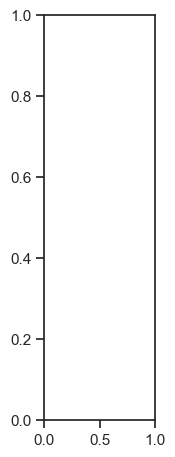

In [192]:
plt.figure(figsize=(15, 5))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(1, len(numerical_cols), i)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

In [71]:
# here is one error  in stay Nov-20 which should be 11 to 20
df.Stay.unique()

array(['0-10', '41-50', '31-40', 'Nov-20', '51-60', '21-30', '71-80',
       'More than 100 Days', '81-90', '61-70', '91-100'], dtype=object)

In [72]:
# df['Stay'] = df['Stay'].replace('Nov-20', '11-20')


In [73]:
df.Stay.unique()

array(['0-10', '41-50', '31-40', 'Nov-20', '51-60', '21-30', '71-80',
       'More than 100 Days', '81-90', '61-70', '91-100'], dtype=object)

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318438 entries, 0 to 318437
Data columns (total 18 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   case_id                            318438 non-null  int64  
 1   Hospital_code                      318438 non-null  int64  
 2   Hospital_type_code                 318438 non-null  object 
 3   City_Code_Hospital                 318438 non-null  int64  
 4   Hospital_region_code               318438 non-null  object 
 5   Available_Extra_Rooms_in_Hospital  318438 non-null  int64  
 6   Department                         318438 non-null  object 
 7   Ward_Type                          318438 non-null  object 
 8   Ward_Facility_Code                 318438 non-null  object 
 9   Bed_Grade                          318438 non-null  float64
 10  patientid                          318438 non-null  int64  
 11  City_Code_Patient                  3184

In [75]:
categorical_cols

['Hospital_type_code',
 'Hospital_region_code',
 'Department',
 'Ward_Type',
 'Ward_Facility_Code',
 'Type_of_Admission',
 'Severity_of_Illness',
 'Age',
 'Stay']

In [76]:
df.Type_of_Admission.value_counts()

Type_of_Admission
Trauma       152261
Emergency    117676
Urgent        48501
Name: count, dtype: int64

In [77]:
df['Age']=df['Age'].replace('Nov-20','11-20')

In [78]:
df.Age.unique()

array(['51-60', '71-80', '31-40', '41-50', '81-90', '61-70', '21-30',
       '11-20', '0-10', '91-100'], dtype=object)

# Feature Enginering

In [80]:
# apply manual encoding
df['Stay'] = df['Stay'].replace({
    '0-10': 1, 
    '41-50': 5, 
    '31-40': 4, 
    'Nov-20': 2, 
    '51-60': 6, 
    '21-30': 3, 
    '71-80': 8,
    'More than 100 Days': 11, 
    '81-90': 9, 
    '61-70': 7, 
    '91-100': 10
})


In [81]:
df['Stay']

0         1
1         5
2         4
3         5
4         5
         ..
318433    2
318434    4
318435    2
318436    2
318437    1
Name: Stay, Length: 318438, dtype: int64

In [82]:
# apply manual encoding
df['Age'] = df['Age'].replace({
    '0-10': 1, 
    '41-50': 5, 
    '31-40': 4, 
    '11-20': 2, 
    '51-60': 6, 
    '21-30': 3, 
    '71-80': 8, 
    '81-90': 9, 
    '61-70': 7, 
    '91-100': 10
})


<Axes: xlabel='case_id', ylabel='Count'>

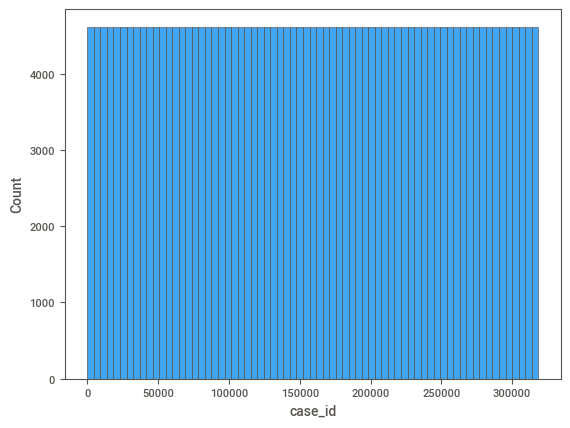

In [83]:
sns.histplot(data=df,x='case_id')

In [84]:
# it has unifrom sitrubution so we are remiving it

In [58]:
data.drop('case_id',axis=1,inplace=True)

In [48]:
data=df

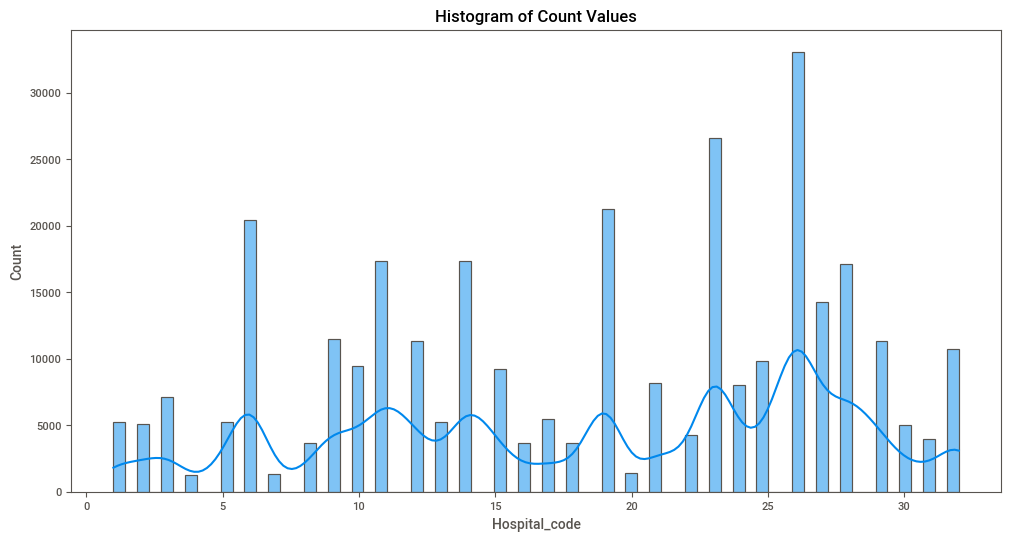

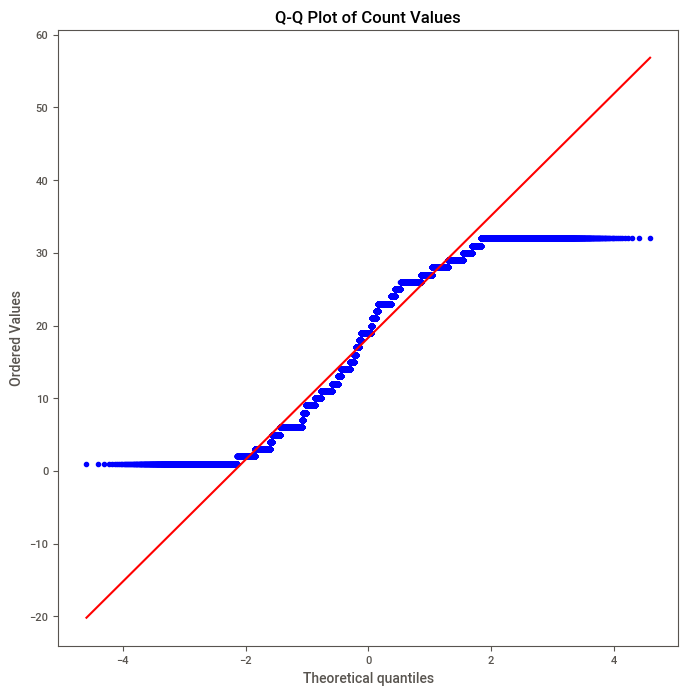

In [50]:

#Hospital_code
from scipy.stats import probplot

# Assuming your data is in a pandas DataFrame

# Histogram
plt.figure(figsize=(12, 6))
sns.histplot(data['Hospital_code'], kde=True)
plt.title('Histogram of Count Values')
plt.show()

# Q-Q Plot
plt.figure(figsize=(8, 8))
probplot(data['Hospital_code'], dist='norm', plot=plt)
plt.title('Q-Q Plot of Count Values')
plt.show()

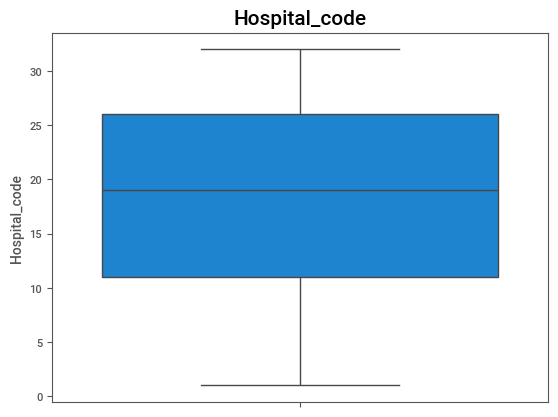

In [52]:
#check for outliers
sns.boxplot(data['Hospital_code'])
plt.title('Hospital_code',fontsize=15)
plt.show()

In [89]:
df.Hospital_type_code.unique()

array(['c', 'e', 'b', 'a', 'f', 'd', 'g'], dtype=object)

In [54]:
data['Hospital_type_code'].replace({'a':1,'b':2,'c':3,'d':4,'e':5,'f':6,'g':7},inplace=True)

In [60]:
data

,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available_Extra_Rooms_in_Hospital,Department,Ward_Type,Ward_Facility_Code,Bed_Grade,patientid,City_Code_Patient,Type_of_Admission,Severity_of_Illness,Visitors_with_Patient,Age,Admission_Deposit,Stay
0,8,3,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911,0-10
1,2,3,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954,41-50
2,10,5,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745,31-40
3,26,2,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272,41-50
4,26,2,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558,41-50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318433,6,1,6,X,3,radiotherapy,Q,F,4.0,86499,23.0,Emergency,Moderate,3,41-50,4144,Nov-20
318434,24,1,1,X,2,anesthesia,Q,E,4.0,325,8.0,Urgent,Moderate,4,81-90,6699,31-40
318435,7,1,4,X,3,gynecology,R,F,4.0,125235,10.0,Emergency,Minor,3,71-80,4235,Nov-20
318436,11,2,2,Y,3,anesthesia,Q,D,3.0,91081,8.0,Trauma,Minor,5,Nov-20,3761,Nov-20


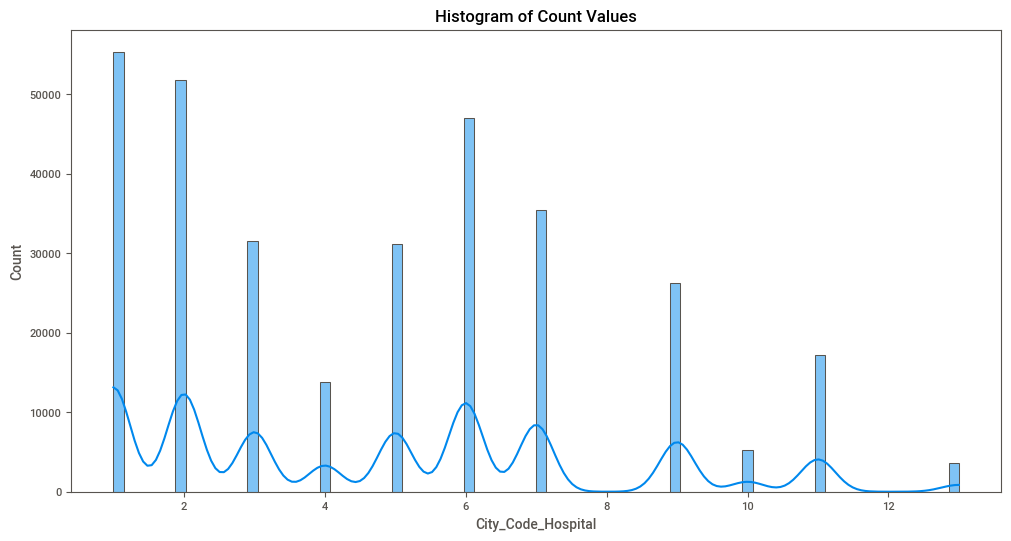

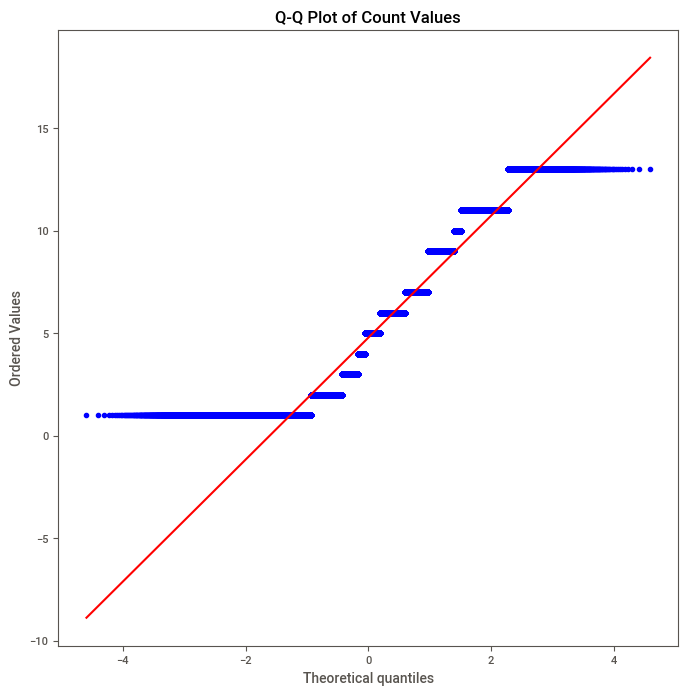

In [62]:
from scipy.stats import probplot

# Assuming your data is in a pandas DataFrame

# Histogram
plt.figure(figsize=(12, 6))
sns.histplot(data['City_Code_Hospital'], kde=True)
plt.title('Histogram of Count Values')
plt.show()

# Q-Q Plot
plt.figure(figsize=(8, 8))
probplot(data['City_Code_Hospital'], dist='norm', plot=plt)
plt.title('Q-Q Plot of Count Values')
plt.show()

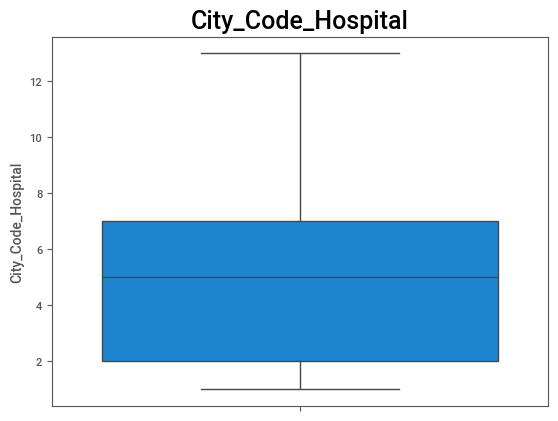

In [64]:
sns.boxplot(data['City_Code_Hospital'])
plt.title('City_Code_Hospital',fontsize=18)
plt.show()

In [66]:
data.Hospital_region_code.value_counts()

Hospital_region_code
X    133336
Y    122428
Z     62674
Name: count, dtype: int64

Hospital_region_code contain nomial datatype
we use one-hot encoder for Hospital_region_code to replace object to numerical datatype

In [68]:
Hospital_region_code=pd.get_dummies(data['Hospital_region_code'],prefix='Hospital_region',drop_first=True)

In [70]:

data=pd.concat([data,Hospital_region_code],axis=1).drop(['Hospital_region_code'],axis=1)

In [72]:
data

,Hospital_code,Hospital_type_code,City_Code_Hospital,Available_Extra_Rooms_in_Hospital,Department,Ward_Type,Ward_Facility_Code,Bed_Grade,patientid,City_Code_Patient,Type_of_Admission,Severity_of_Illness,Visitors_with_Patient,Age,Admission_Deposit,Stay,Hospital_region_Y,Hospital_region_Z
0,8,3,3,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911,0-10,False,True
1,2,3,5,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954,41-50,False,True
2,10,5,1,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745,31-40,False,False
3,26,2,2,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272,41-50,True,False
4,26,2,2,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558,41-50,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318433,6,1,6,3,radiotherapy,Q,F,4.0,86499,23.0,Emergency,Moderate,3,41-50,4144,Nov-20,False,False
318434,24,1,1,2,anesthesia,Q,E,4.0,325,8.0,Urgent,Moderate,4,81-90,6699,31-40,False,False
318435,7,1,4,3,gynecology,R,F,4.0,125235,10.0,Emergency,Minor,3,71-80,4235,Nov-20,False,False
318436,11,2,2,3,anesthesia,Q,D,3.0,91081,8.0,Trauma,Minor,5,Nov-20,3761,Nov-20,True,False


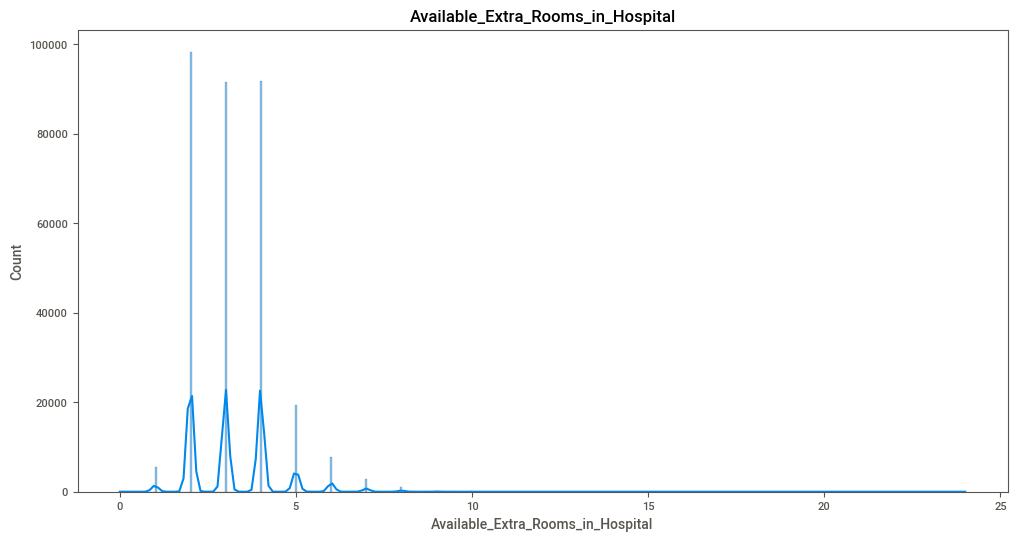

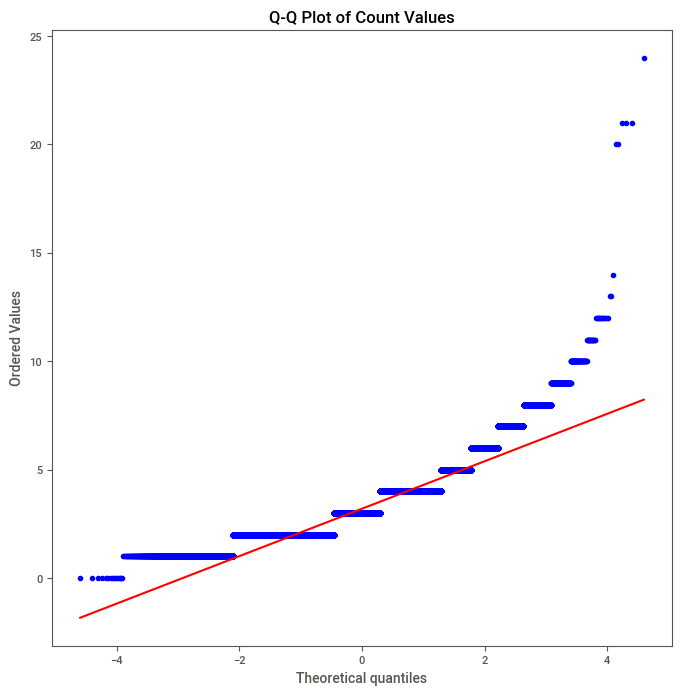

In [74]:
#Available_Extra_Rooms_in_Hospital
from scipy.stats import probplot

# Assuming your data is in a pandas DataFrame

# Histogram
plt.figure(figsize=(12, 6))
sns.histplot(data['Available_Extra_Rooms_in_Hospital'], kde=True)
plt.title('Available_Extra_Rooms_in_Hospital')
plt.show()

# Q-Q Plot
plt.figure(figsize=(8, 8))
probplot(data['Available_Extra_Rooms_in_Hospital'], dist='norm', plot=plt)
plt.title('Q-Q Plot of Count Values')
plt.show()

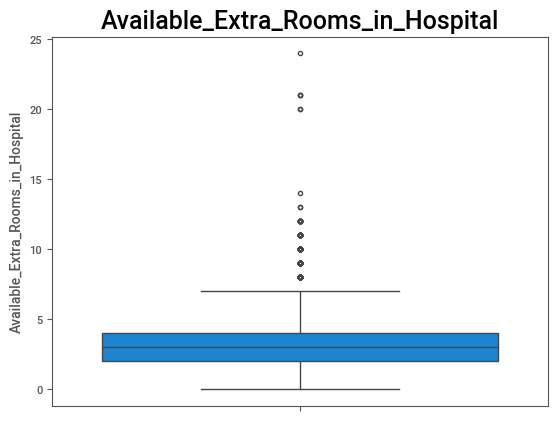

In [76]:
sns.boxplot(data['Available_Extra_Rooms_in_Hospital'])
plt.title('Available_Extra_Rooms_in_Hospital',fontsize=18)
plt.show()

In [80]:
from scipy import stats
IQR=stats.iqr(data.Available_Extra_Rooms_in_Hospital,interpolation='midpoint')
IQR

2.0

In [82]:
Q1=data.Available_Extra_Rooms_in_Hospital.quantile(0.25)
print("Q1:",Q1)
Q3=data.Available_Extra_Rooms_in_Hospital.quantile(0.75)
print("Q3:",Q3)

min_limit=Q1-(1.5*IQR)
print("Min_Lim",min_limit)
max_lim=Q3+(1.5*IQR)
print("Max_Lim",IQR)

Q1: 2.0
Q3: 4.0
Min_Lim -1.0
Max_Lim 2.0


In [84]:
data.loc[data['Available_Extra_Rooms_in_Hospital']>max_lim,'Available_Extra_Rooms_in_Hospital']=np.median(data.Available_Extra_Rooms_in_Hospital)

In [86]:
data.loc[data['Available_Extra_Rooms_in_Hospital']<min_limit]

,Hospital_code,Hospital_type_code,City_Code_Hospital,Available_Extra_Rooms_in_Hospital,Department,Ward_Type,Ward_Facility_Code,Bed_Grade,patientid,City_Code_Patient,Type_of_Admission,Severity_of_Illness,Visitors_with_Patient,Age,Admission_Deposit,Stay,Hospital_region_Y,Hospital_region_Z


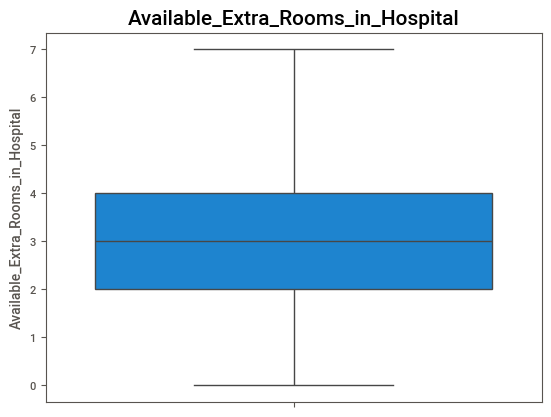

In [88]:
sns.boxplot(data.Available_Extra_Rooms_in_Hospital)
plt.title("Available_Extra_Rooms_in_Hospital",fontsize=15)
plt.show()

In [90]:
#Department
# Unique values
data.Department.unique()

array(['radiotherapy', 'anesthesia', 'gynecology', 'TB & Chest disease',
       'surgery'], dtype=object)

In [92]:
data['Department'].replace({'gynecology':1,'anesthesia':2,'radiotherapy':3,'TB & Chest disease':4,'surgery':5},inplace=True)

In [94]:
data

,Hospital_code,Hospital_type_code,City_Code_Hospital,Available_Extra_Rooms_in_Hospital,Department,Ward_Type,Ward_Facility_Code,Bed_Grade,patientid,City_Code_Patient,Type_of_Admission,Severity_of_Illness,Visitors_with_Patient,Age,Admission_Deposit,Stay,Hospital_region_Y,Hospital_region_Z
0,8,3,3,3,3,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911,0-10,False,True
1,2,3,5,2,3,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954,41-50,False,True
2,10,5,1,2,2,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745,31-40,False,False
3,26,2,2,2,3,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272,41-50,True,False
4,26,2,2,2,3,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558,41-50,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318433,6,1,6,3,3,Q,F,4.0,86499,23.0,Emergency,Moderate,3,41-50,4144,Nov-20,False,False
318434,24,1,1,2,2,Q,E,4.0,325,8.0,Urgent,Moderate,4,81-90,6699,31-40,False,False
318435,7,1,4,3,1,R,F,4.0,125235,10.0,Emergency,Minor,3,71-80,4235,Nov-20,False,False
318436,11,2,2,3,2,Q,D,3.0,91081,8.0,Trauma,Minor,5,Nov-20,3761,Nov-20,True,False


In [96]:
#Ward Type
# Unique values
data.Ward_Type.unique()

array(['R', 'S', 'Q', 'P', 'T', 'U'], dtype=object)

In [98]:
data['Ward_Type'].replace({'R':1,'Q':2,'S':3,'P':4,'T':5,'U':6},inplace=True)

In [100]:
#ward_facility_code
data.Ward_Facility_Code.unique()

array(['F', 'E', 'D', 'B', 'A', 'C'], dtype=object)

In [104]:
data['Ward_Facility_Code'].replace({'F':1,'E':2,'D':3,'C':4,'B':5,'A':6},inplace=True)

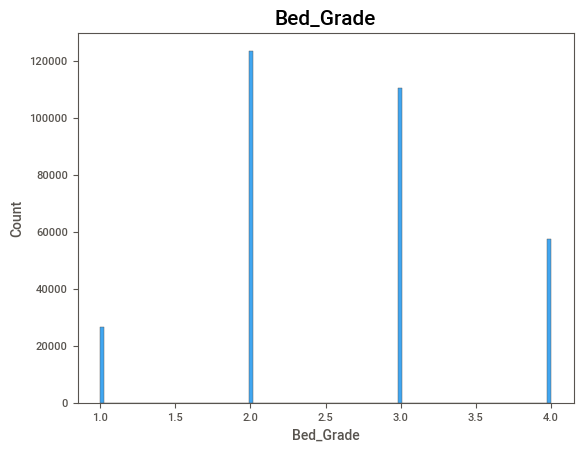

In [106]:
#Bed_Grade
sns.histplot(data['Bed_Grade'])
plt.title('Bed_Grade',fontsize=15)
plt.show()

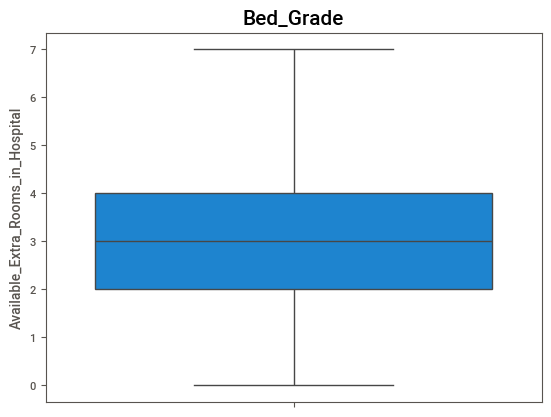

In [108]:
sns.boxplot(data.Available_Extra_Rooms_in_Hospital)
plt.title("Bed_Grade",fontsize=15)
plt.show()

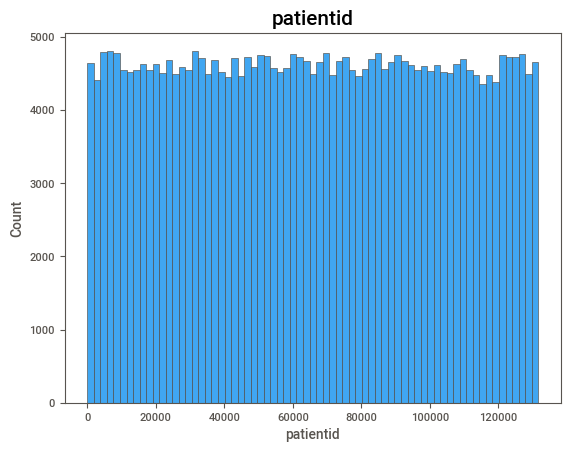

In [110]:
sns.histplot(data['patientid'])
plt.title('patientid',fontsize=15)
plt.show()

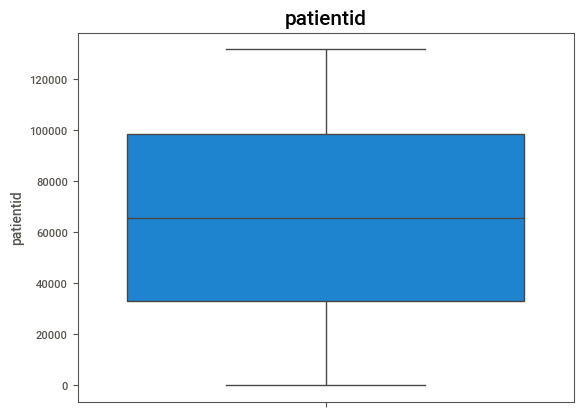

In [112]:
sns.boxplot(data['patientid'])
plt.title('patientid',fontsize=15)
plt.show()

In [114]:
#Reducing memory space
data['patientid']=pd.to_numeric(data.patientid,downcast='integer')

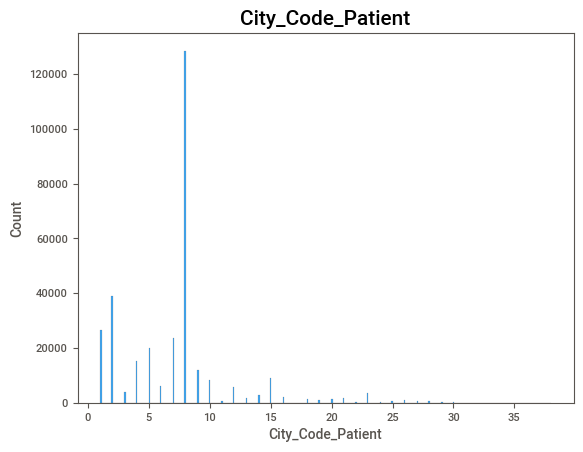

In [116]:

#city code patient
sns.histplot(data['City_Code_Patient'])
plt.title('City_Code_Patient',fontsize=15)
plt.show()

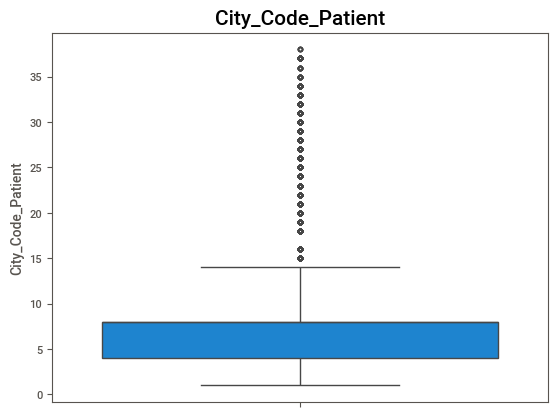

In [118]:
sns.boxplot(data['City_Code_Patient'])
plt.title('City_Code_Patient',fontsize=15)
plt.show()

In [120]:
#handling Outlier
from scipy import stats
IQR=stats.iqr(data.City_Code_Patient,interpolation='midpoint')
IQR

4.0

In [124]:

Q1=data.City_Code_Patient.quantile(0.25)
print("Q1:",Q1)
Q3=data.City_Code_Patient.quantile(0.75)
print("Q3:",Q3)

max_lim=Q3+(1.5*IQR)
print('max_lim:',max_lim)
min_lim=Q1-(1.5*IQR)
print('min_lim:',min_lim)

Q1: 4.0
Q3: 8.0
max_lim: 14.0
min_lim: -2.0


In [128]:
data.loc[data['City_Code_Patient']>max_lim,'City_Code_Patient']=np.median(data.City_Code_Patient)

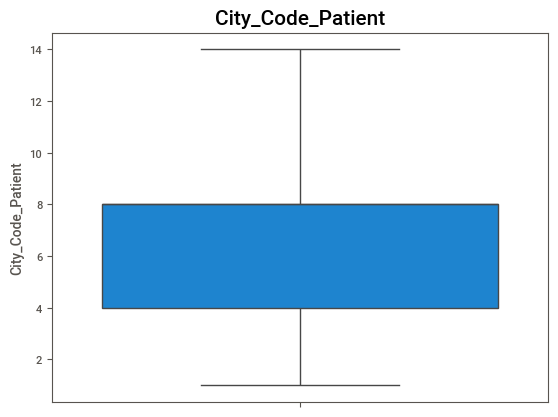

In [126]:

sns.boxplot(data['City_Code_Patient'])
plt.title('City_Code_Patient',fontsize=15)
plt.show()

In [130]:
#Reducing memory space
data['City_Code_Patient']=pd.to_numeric(data.City_Code_Patient,downcast='float')

In [132]:

#Type_of_admission
data.Type_of_Admission.unique()

array(['Emergency', 'Trauma', 'Urgent'], dtype=object)

## Feautre selection

In [138]:
#Using one hot encoder to convert into binary format
Type_of_Admission=pd.get_dummies(data.Type_of_Admission,prefix='Admission',drop_first=True)
data=pd.concat([data,Type_of_Admission],axis=1).drop(['Type_of_Admission'],axis=1)
data

,Hospital_code,Hospital_type_code,City_Code_Hospital,Available_Extra_Rooms_in_Hospital,Department,Ward_Type,Ward_Facility_Code,Bed_Grade,patientid,City_Code_Patient,Severity_of_Illness,Visitors_with_Patient,Age,Admission_Deposit,Stay,Hospital_region_Y,Hospital_region_Z,Admission_Trauma,Admission_Urgent
0,8,3,3,3,3,1,1,2.0,31397,7.0,Extreme,2,51-60,4911,0-10,False,True,False,False
1,2,3,5,2,3,3,1,2.0,31397,7.0,Extreme,2,51-60,5954,41-50,False,True,True,False
2,10,5,1,2,2,3,2,2.0,31397,7.0,Extreme,2,51-60,4745,31-40,False,False,True,False
3,26,2,2,2,3,1,3,2.0,31397,7.0,Extreme,2,51-60,7272,41-50,True,False,True,False
4,26,2,2,2,3,3,3,2.0,31397,7.0,Extreme,2,51-60,5558,41-50,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318433,6,1,6,3,3,2,1,4.0,86499,8.0,Moderate,3,41-50,4144,Nov-20,False,False,False,False
318434,24,1,1,2,2,2,2,4.0,325,8.0,Moderate,4,81-90,6699,31-40,False,False,False,True
318435,7,1,4,3,1,1,1,4.0,125235,10.0,Minor,3,71-80,4235,Nov-20,False,False,False,False
318436,11,2,2,3,2,2,3,3.0,91081,8.0,Minor,5,Nov-20,3761,Nov-20,True,False,True,False


In [140]:

#Severity_of_Illness.unique
data.Severity_of_Illness.unique()

array(['Extreme', 'Moderate', 'Minor'], dtype=object)

In [152]:
Severity_of_Illness=pd.get_dummies(data['Severity_of_Illness'],prefix='Illness',drop_first=True)
data=pd.concat([data,Severity_of_Illness],axis=1,axis=1)

,Hospital_code,Hospital_type_code,City_Code_Hospital,Available_Extra_Rooms_in_Hospital,Department,Ward_Type,Ward_Facility_Code,Bed_Grade,patientid,City_Code_Patient,Visitors_with_Patient,Age,Admission_Deposit,Stay,Hospital_region_Y,Hospital_region_Z,Admission_Trauma,Admission_Urgent,Illness_Minor,Illness_Moderate
0,8,3,3,3,3,1,1,2.0,31397,7.0,2,51-60,4911,0-10,False,True,False,False,False,False
1,2,3,5,2,3,3,1,2.0,31397,7.0,2,51-60,5954,41-50,False,True,True,False,False,False
2,10,5,1,2,2,3,2,2.0,31397,7.0,2,51-60,4745,31-40,False,False,True,False,False,False
3,26,2,2,2,3,1,3,2.0,31397,7.0,2,51-60,7272,41-50,True,False,True,False,False,False
4,26,2,2,2,3,3,3,2.0,31397,7.0,2,51-60,5558,41-50,True,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318433,6,1,6,3,3,2,1,4.0,86499,8.0,3,41-50,4144,Nov-20,False,False,False,False,False,True
318434,24,1,1,2,2,2,2,4.0,325,8.0,4,81-90,6699,31-40,False,False,False,True,False,True
318435,7,1,4,3,1,1,1,4.0,125235,10.0,3,71-80,4235,Nov-20,False,False,False,False,True,False
318436,11,2,2,3,2,2,3,3.0,91081,8.0,5,Nov-20,3761,Nov-20,True,False,True,False,True,False


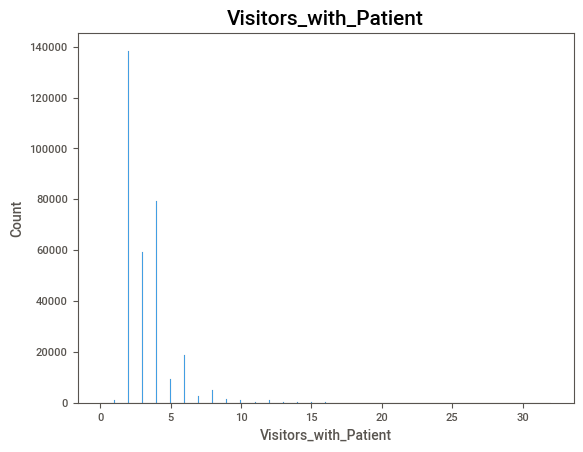

In [154]:
#visitors_with_patient
sns.histplot(data['Visitors_with_Patient'])
plt.title('Visitors_with_Patient',fontsize=15)
plt.show()

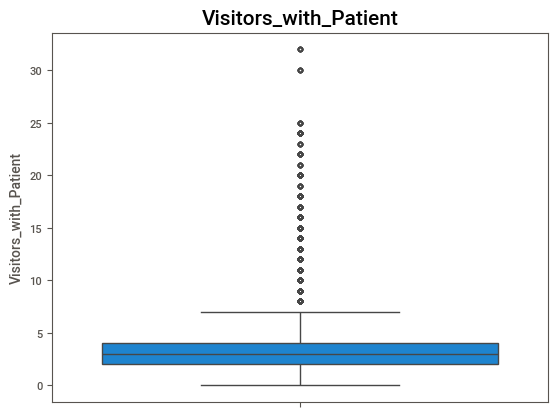

In [156]:

sns.boxplot(data['Visitors_with_Patient'])
plt.title('Visitors_with_Patient',fontsize=15)
plt.show()

In [158]:
#handling outlier
from scipy import stats
IQR=stats.iqr(data.Visitors_with_Patient,interpolation='midpoint')
IQR

2.0

In [160]:
Q1=data.Visitors_with_Patient.quantile(0.25)
print("Q1:",Q1)
Q3=data.Visitors_with_Patient.quantile(0.75)
print("Q3:",Q3)

min_lim=Q1-(1.5*IQR)
print("Min_lim",min_lim)
max_lim=Q3+(1.5*IQR)
print("Max_lim",max_lim)

Q1: 2.0
Q3: 4.0
Min_lim -1.0
Max_lim 7.0


In [162]:
data.loc[data['Visitors_with_Patient']>max_lim,'Visitors_with_Patient']=np.median(data.Visitors_with_Patient.dropna(axis=0))


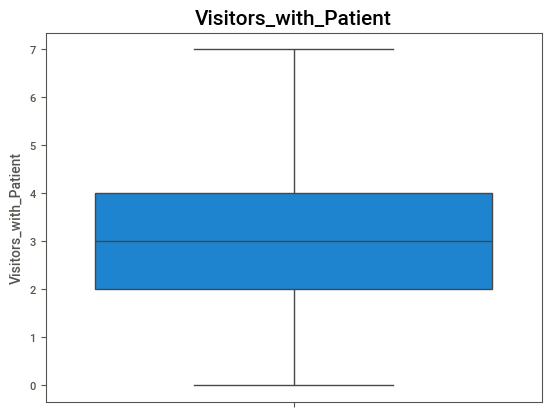

In [164]:
sns.boxplot(data['Visitors_with_Patient'])
plt.title('Visitors_with_Patient',fontsize=15)
plt.show()

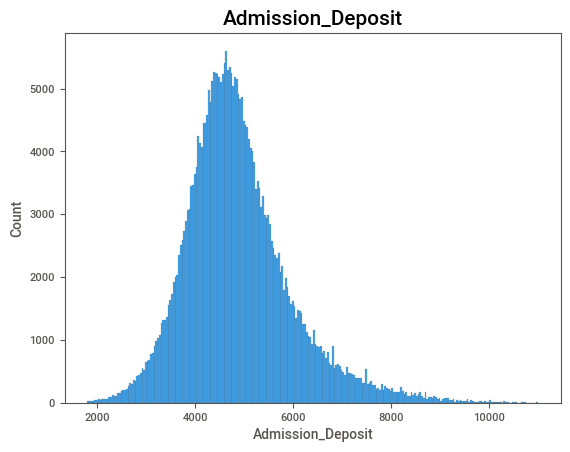

In [166]:

#Admission_deposit
sns.histplot(data['Admission_Deposit'])
plt.title("Admission_Deposit",fontsize=15)
plt.show()

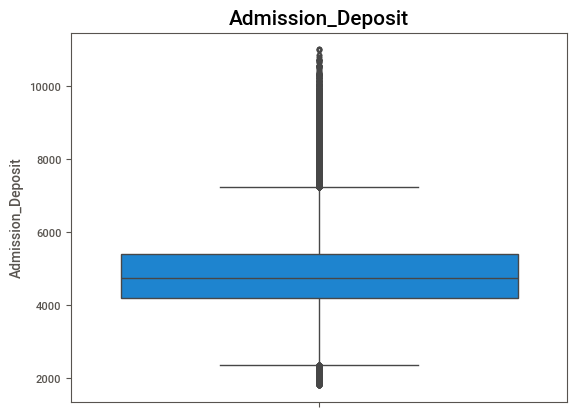

In [168]:
sns.boxplot(data['Admission_Deposit'])
plt.title('Admission_Deposit',fontsize=15)
plt.show()

we found so many outliers in Admission_Deposit
We can remove this outlier but it is necessary because some people may stay more days

In [171]:
# Age and Stay
data[['Stay','Age']]

,Stay,Age
0,0-10,51-60
1,41-50,51-60
2,31-40,51-60
3,41-50,51-60
4,41-50,51-60
...,...,...
318433,Nov-20,41-50
318434,31-40,81-90
318435,Nov-20,71-80
318436,Nov-20,Nov-20


In [173]:

def get_categorical_unique(data):
    categorical_columns=[column for column in data.dtypes.index if data.dtypes[column]=='object']
    categorical_uniques={column:data[column].unique() for column in categorical_columns}
    
    return categorical_uniques

In [175]:
get_categorical_unique(data)

{'Age': array(['51-60', '71-80', '31-40', '41-50', '81-90', '61-70', '21-30',
        'Nov-20', '0-10', '91-100'], dtype=object),
 'Stay': array(['0-10', '41-50', '31-40', 'Nov-20', '51-60', '21-30', '71-80',
        'More than 100 Days', '81-90', '61-70', '91-100'], dtype=object)}

In [177]:

categorical_uniques=get_categorical_unique(data)
get_categorical_unique(data)

{'Age': array(['51-60', '71-80', '31-40', '41-50', '81-90', '61-70', '21-30',
        'Nov-20', '0-10', '91-100'], dtype=object),
 'Stay': array(['0-10', '41-50', '31-40', 'Nov-20', '51-60', '21-30', '71-80',
        'More than 100 Days', '81-90', '61-70', '91-100'], dtype=object)}

In [179]:

for column in categorical_uniques:
    categorical_uniques[column]=sorted(categorical_uniques[column])

In [181]:
categorical_uniques

{'Age': ['0-10',
  '21-30',
  '31-40',
  '41-50',
  '51-60',
  '61-70',
  '71-80',
  '81-90',
  '91-100',
  'Nov-20'],
 'Stay': ['0-10',
  '21-30',
  '31-40',
  '41-50',
  '51-60',
  '61-70',
  '71-80',
  '81-90',
  '91-100',
  'More than 100 Days',
  'Nov-20']}

In [183]:
def ordinal_encode(data,uniques):
    for column in uniques:
        data[column]=data[column].apply(lambda x: uniques[column].index(x))
ordinal_encode(data,categorical_uniques)

In [185]:

data.dtypes

Hospital_code                          int64
Hospital_type_code                     int64
City_Code_Hospital                     int64
Available_Extra_Rooms_in_Hospital      int64
Department                             int64
Ward_Type                              int64
Ward_Facility_Code                     int64
Bed_Grade                            float64
patientid                              int32
City_Code_Patient                    float32
Visitors_with_Patient                  int64
Age                                    int64
Admission_Deposit                      int64
Stay                                   int64
Hospital_region_Y                       bool
Hospital_region_Z                       bool
Admission_Trauma                        bool
Admission_Urgent                        bool
Illness_Minor                           bool
Illness_Moderate                        bool
dtype: object

In [187]:
data['Age']=pd.to_numeric(data.Age,downcast='integer')
data['Stay']=pd.to_numeric(data.Stay,downcast='integer')

## Feature Selection

In [190]:

data.corr()

,Hospital_code,Hospital_type_code,City_Code_Hospital,Available_Extra_Rooms_in_Hospital,Department,Ward_Type,Ward_Facility_Code,Bed_Grade,patientid,City_Code_Patient,Visitors_with_Patient,Age,Admission_Deposit,Stay,Hospital_region_Y,Hospital_region_Z,Admission_Trauma,Admission_Urgent,Illness_Minor,Illness_Moderate
Hospital_code,1.000000,0.039449,0.128294,-0.064638,0.014823,0.012135,0.132347,-0.013948,0.002291,-0.005624,-0.030385,0.010138,0.045446,-0.012704,0.199212,-0.250500,-0.002291,-0.012086,-0.026442,0.005939
Hospital_type_code,0.039449,1.000000,-0.000839,-0.102539,-0.024754,0.223661,0.265768,0.018642,-0.003010,0.047532,-0.040882,0.006483,0.025341,-0.010271,0.015765,0.244889,0.046488,0.044452,-0.004195,-0.001701
City_Code_Hospital,0.128294,-0.000839,1.000000,-0.040769,-0.010848,-0.040735,0.100474,-0.049248,0.000750,-0.021897,0.021167,0.008408,-0.034455,0.020320,0.216058,-0.124312,-0.038472,0.011837,-0.026229,0.011690
Available_Extra_Rooms_in_Hospital,-0.064638,-0.102539,-0.040769,1.000000,-0.091781,-0.075760,-0.053154,-0.120026,0.000897,-0.024005,0.129325,-0.138978,-0.141784,-0.031618,-0.014122,-0.000300,-0.048702,0.014017,-0.004370,0.015066
Department,0.014823,-0.024754,-0.010848,-0.091781,1.000000,0.013891,-0.014470,0.053575,0.005300,0.011024,-0.006590,0.080078,0.084338,0.015486,0.004679,-0.026300,0.015503,-0.013569,-0.037623,0.015419
Ward_Type,0.012135,0.223661,-0.040735,-0.075760,0.013891,1.000000,0.217726,-0.019193,0.000511,0.104941,0.078980,0.022874,-0.023761,0.016718,0.211891,0.055015,-0.053976,-0.006604,-0.016778,-0.002232
Ward_Facility_Code,0.132347,0.265768,0.100474,-0.053154,-0.014470,0.217726,1.000000,-0.075984,-0.001923,0.216534,-0.008746,0.004863,0.023057,0.001536,0.538828,0.150495,-0.084537,0.017306,-0.027433,0.000773
Bed_Grade,-0.013948,0.018642,-0.049248,-0.120026,0.053575,-0.019193,-0.075984,1.000000,0.001638,-0.024438,0.018183,0.058116,0.073779,0.093728,-0.101365,0.021621,0.106135,0.047094,0.254384,-0.074921
patientid,0.002291,-0.003010,0.000750,0.000897,0.005300,0.000511,-0.001923,0.001638,1.000000,0.001116,0.004885,-0.001215,-0.000877,0.001401,0.002157,-0.003291,-0.003095,0.004546,0.003805,0.001735
City_Code_Patient,-0.005624,0.047532,-0.021897,-0.024005,0.011024,0.104941,0.216534,-0.024438,0.001116,1.000000,0.008020,0.024325,0.039697,0.002797,0.218506,0.047740,-0.053223,-0.006569,0.000867,-0.011577


Text(0.5, 1.0, 'Heat map showing correlation between the feature ')

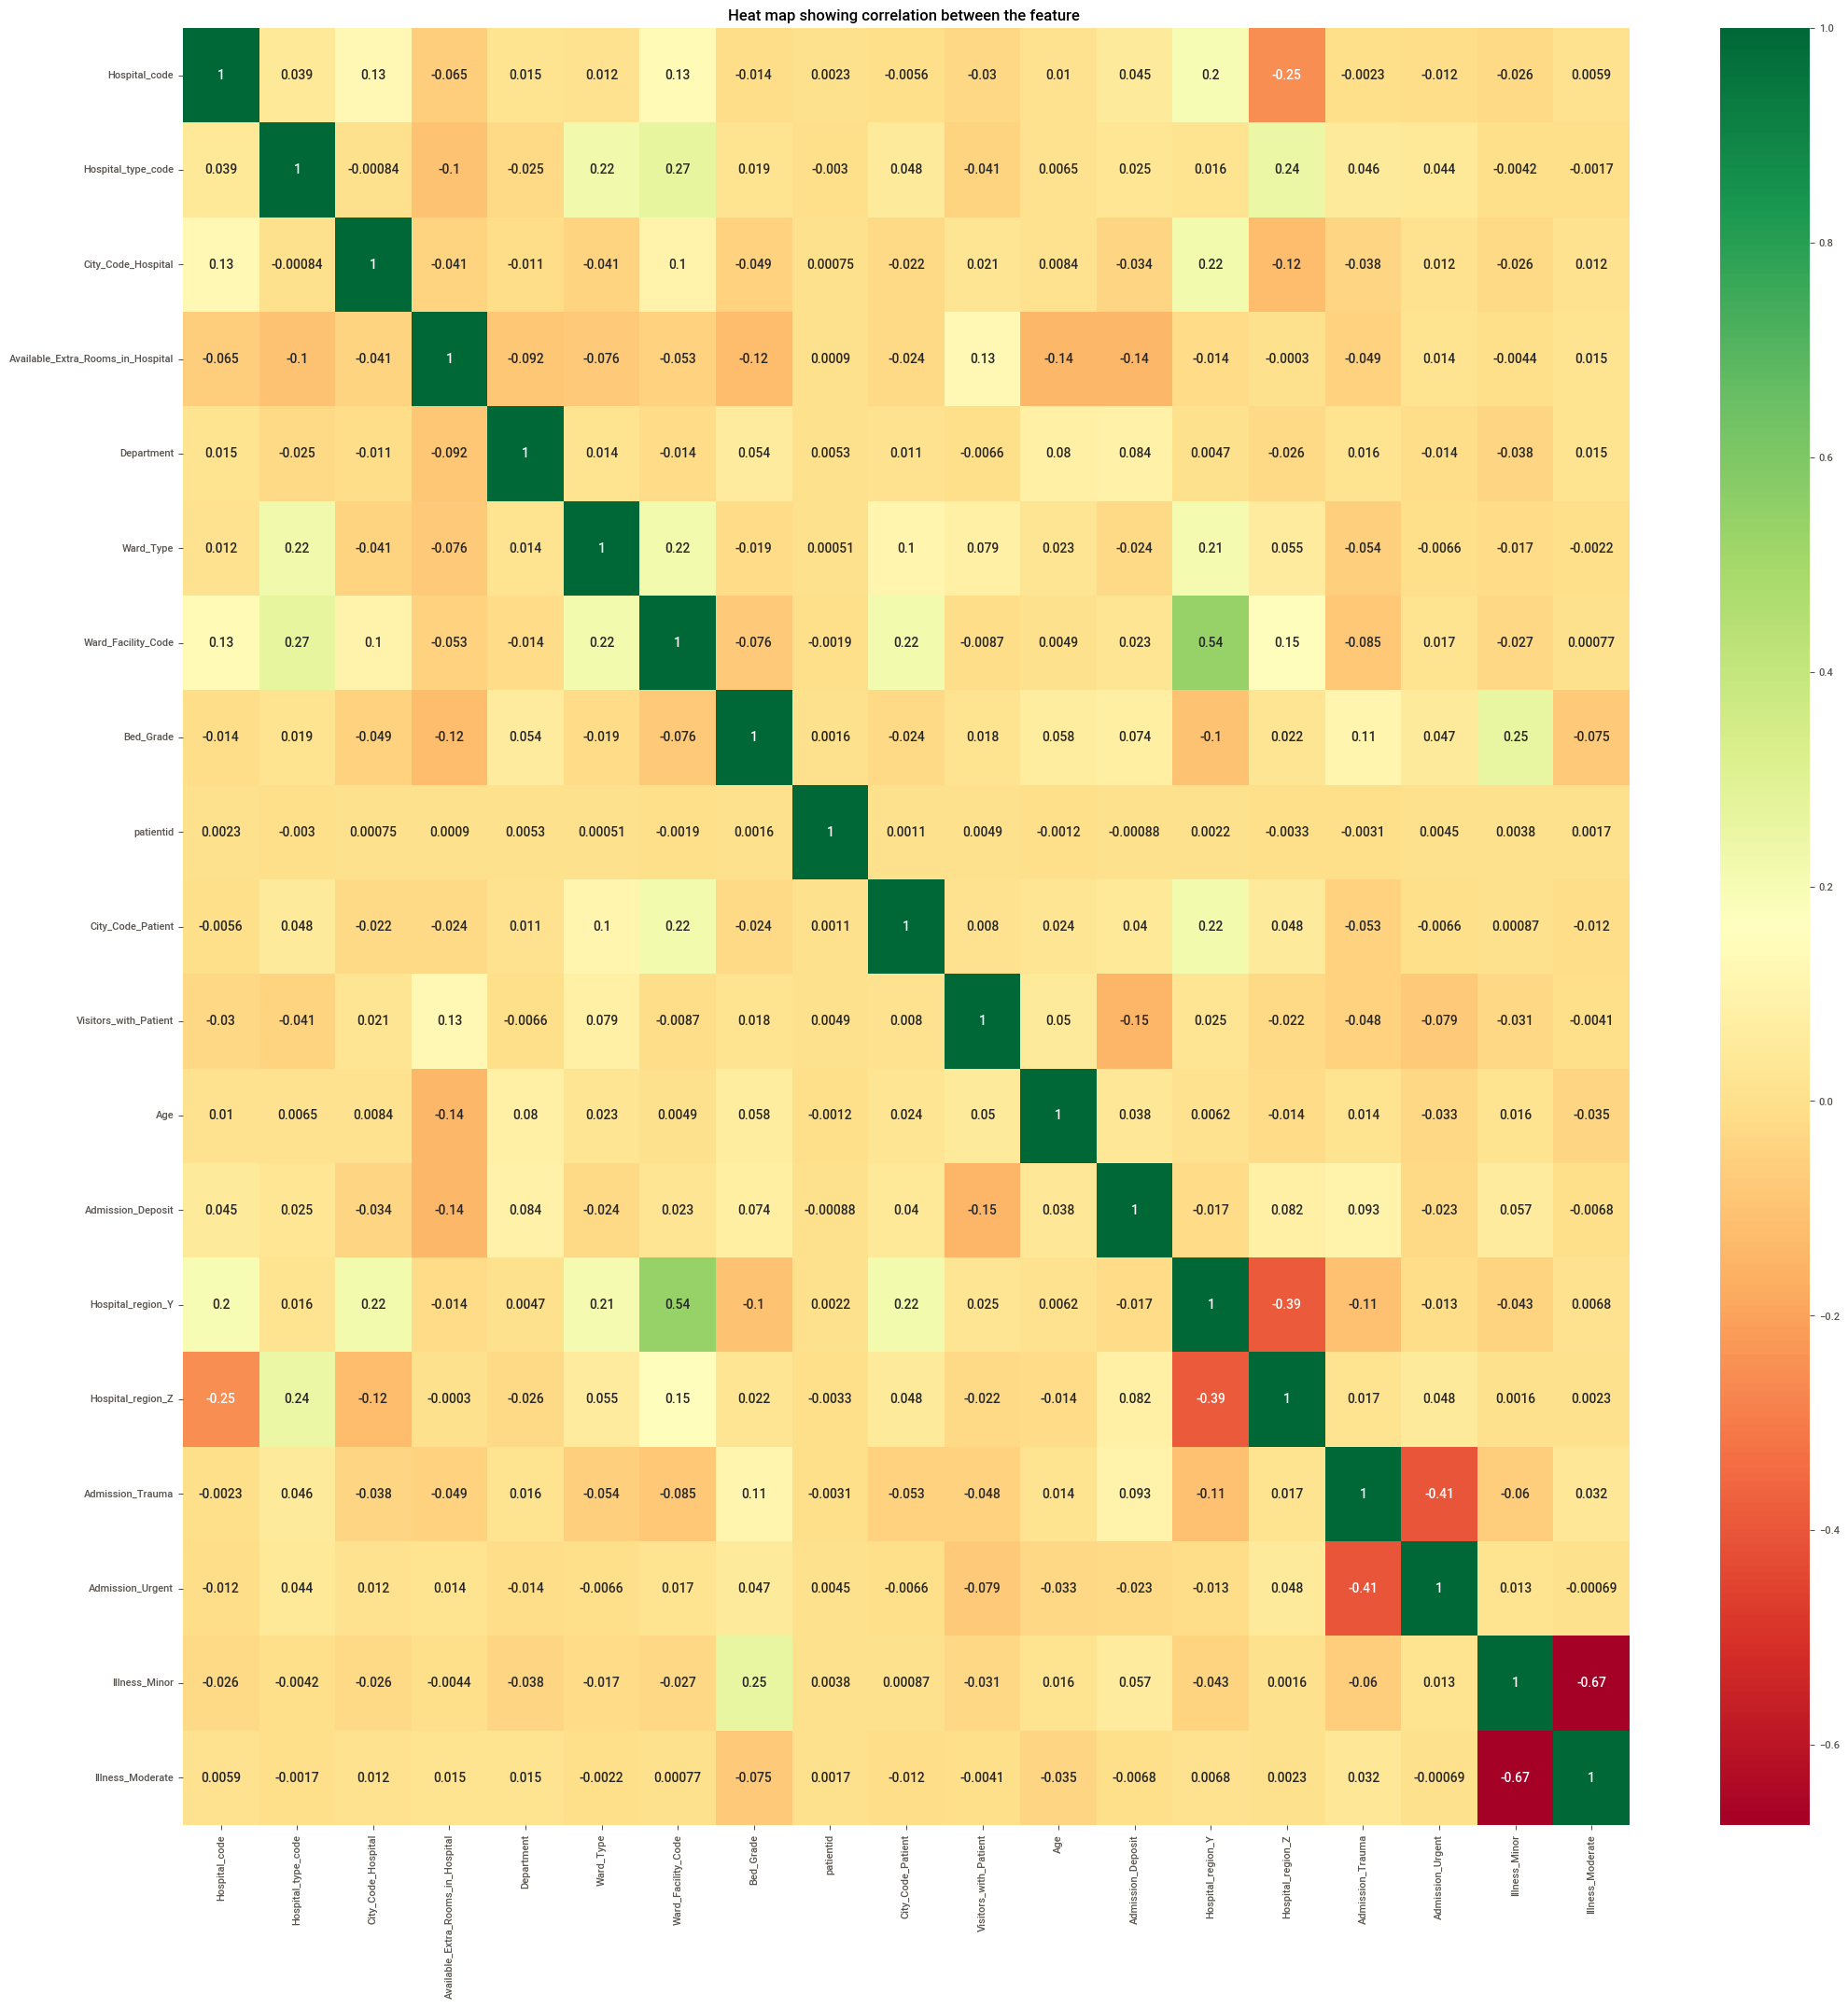

In [192]:
plt.figure(figsize=(25,25))
sns.heatmap(data.drop('Stay',axis=1).corr(),annot=True,cmap='RdYlGn')
plt.title("Heat map showing correlation between the feature ")

In [194]:
#dropping duplicates
data.drop_duplicates(inplace=True)

        Hospital_code  Hospital_type_code  City_Code_Hospital  \
0                   8                   3                   3   
1                   2                   3                   5   
2                  10                   5                   1   
3                  26                   2                   2   
4                  26                   2                   2   
...               ...                 ...                 ...   
318433              6                   1                   6   
318434             24                   1                   1   
318435              7                   1                   4   
318436             11                   2                   2   
318437             19                   1                   7   

        Available_Extra_Rooms_in_Hospital  Department  Ward_Type  \
0                                       3           3          1   
1                                       2           3          3   
2              

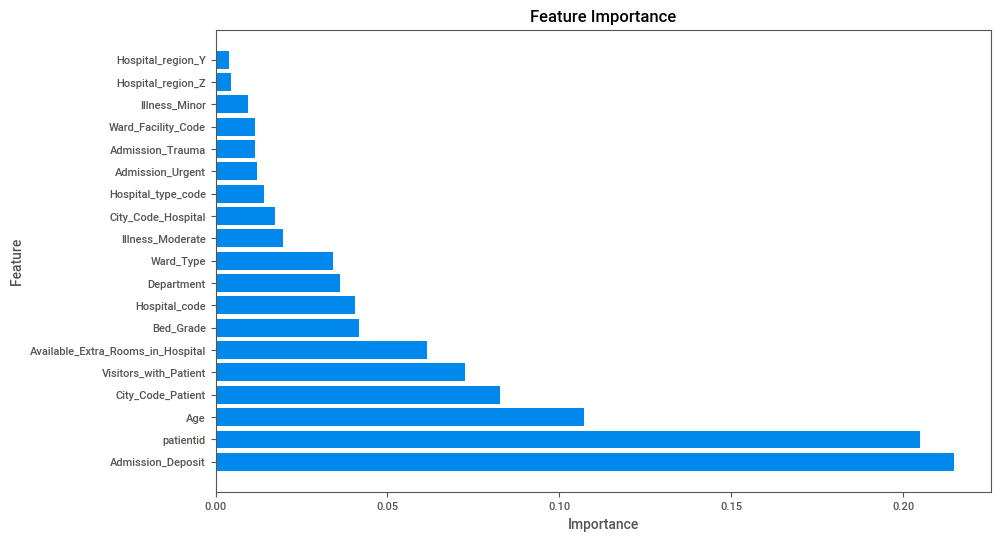

In [200]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Assuming your dataset is stored in a Dataframe named 'data'
# Extract feature and target variable
feature=data.drop('Stay',axis=1)
target=data['Stay']

# convert categorical variable to dummy/indicator variable (if needed)
feature=pd.get_dummies(feature)
print(feature)
# initialize a Random Forest Regressor
RF1_model=RandomForestClassifier(random_state=42)
RF1_model.fit(feature,target)

# Get feature importance
feature_importance=RF1_model.feature_importances_

#create a Dataframe to display feature importance
feature_importances_data=pd.DataFrame({
    'Feature':feature.columns,
    'Importance':feature_importance
})

# sort the DataFrame by importance in descending order
feature_importances_data=feature_importances_data.sort_values(by='Importance',ascending=False)

# Display the feature importance Dataframe
print(feature_importances_data)

#plot feature importance
plt.figure(figsize=(10,6))
plt.barh(feature_importances_data['Feature'],feature_importances_data['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

Here we used Random Feature classifier

We got how many features are very needed for model prediction

In [199]:
data1=data.drop(['Hospital_region_Z','Hospital_region_Z',],axis=1)

# Model Creation

In [206]:

# Split data into train and test
from sklearn.model_selection import train_test_split

In [208]:
x=data1.drop('Stay',axis=1)
y=data1.Stay

In [210]:
# Balancing the Data
from collections import Counter
from imblearn.over_sampling import SMOTE

sm=SMOTE()
print(Counter(y))
x_sm,y_sm=sm.fit_resample(x,y)
print(Counter(y_sm))

Counter({1: 87488, 10: 78135, 2: 55152, 4: 35000, 0: 23599, 3: 11743, 6: 10246, 9: 6666, 7: 4836, 8: 2764, 5: 2744})
Counter({0: 87488, 3: 87488, 2: 87488, 10: 87488, 4: 87488, 1: 87488, 6: 87488, 9: 87488, 7: 87488, 5: 87488, 8: 87488})


In [212]:
# split train and test data for model training and testing
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(254698, 18)
(63675, 18)
(254698,)
(63675,)


## Logistic Regresion

In [215]:
# split train and test data for model training and testing
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(254698, 18)
(63675, 18)
(254698,)
(63675,)


In [220]:
from sklearn.feature_selection import SelectKBest,f_classif
k=17
selector=SelectKBest(f_classif,k=k)
x_train_selected=selector.fit_transform(x_train,y_train)
x_test_selected=selector.transform(x_test)

In [222]:

x_test_selected

array([[26.,  2.,  2., ...,  0.,  0.,  0.],
       [11.,  2.,  2., ...,  0.,  0.,  0.],
       [26.,  2.,  2., ...,  0.,  1.,  0.],
       ...,
       [28.,  2., 11., ...,  0.,  0.,  0.],
       [13.,  1.,  5., ...,  0.,  1.,  0.],
       [27.,  1.,  7., ...,  1.,  1.,  0.]])

In [224]:
x_train_selected

array([[32.,  6.,  9., ...,  0.,  0.,  0.],
       [14.,  1.,  1., ...,  0.,  1.,  0.],
       [23.,  1.,  6., ...,  0.,  0.,  1.],
       ...,
       [23.,  1.,  6., ...,  0.,  0.,  1.],
       [ 9.,  4.,  5., ...,  1.,  0.,  1.],
       [14.,  1.,  1., ...,  0.,  0.,  1.]])

In [226]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,recall_score,roc_auc_score,classification_report,confusion_matrix
# Assuming your_array in your numpy array
X=x_train_selected[:,:-1]
Y=x_train_selected[:,-1]

#sPlit  the data into training and testing sets
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

model1=LogisticRegression()
model1.fit(X_train_scaled,Y_train)

# make prediction on the test set
Y_test_LR=model1.predict(X_test_scaled)
Y_train_LR=model1.predict(X_train_scaled)

In [228]:
# make prediction on train set
print("Confusion matrix:")
print(confusion_matrix(Y_train_LR,Y_train))

print("\nClassification Report:")
print(classification_report(Y_train_LR, Y_train))

print("\nAccuracy Score:")
print(accuracy_score(Y_train_LR, Y_train))

Confusion matrix:
[[ 55089     51]
 [ 36010 112608]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.60      1.00      0.75     55140
         1.0       1.00      0.76      0.86    148618

    accuracy                           0.82    203758
   macro avg       0.80      0.88      0.81    203758
weighted avg       0.89      0.82      0.83    203758


Accuracy Score:
0.8230204458229861


In [230]:

# make prediction on train set
print("Confusion matrix:")
print(confusion_matrix(Y_train_LR,Y_train))

print("\nClassification Report:")
print(classification_report(Y_train_LR, Y_train))

print("\nAccuracy Score:")
print(accuracy_score(Y_train_LR, Y_train))

Confusion matrix:
[[ 55089     51]
 [ 36010 112608]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.60      1.00      0.75     55140
         1.0       1.00      0.76      0.86    148618

    accuracy                           0.82    203758
   macro avg       0.80      0.88      0.81    203758
weighted avg       0.89      0.82      0.83    203758


Accuracy Score:
0.8230204458229861



In logistic regression training accuracy is 82% and testing accuracy is 82%

In [233]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,roc_auc_score

# Assuming your_array in your numpy array
X=x_train_selected[:,:-1]
Y=x_train_selected[:,-1]

#sPlit  the data into training and testing sets
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

model2=DecisionTreeClassifier()
model2.fit(X_train_scaled,Y_train)

# make prediction on the test set
Y_test_tree=model2.predict(X_test_scaled)
Y_train_tree=model2.predict(X_train_scaled)

In [235]:
# make prediction on test set
print("Confusion matrix:")
print(confusion_matrix(Y_test_tree,Y_test))

print("\nClassification Report:")
print(classification_report(Y_test_tree, Y_test))

print("\nAccuracy Score:")
print(accuracy_score(Y_test_tree, Y_test))

Confusion matrix:
[[16945  6588]
 [ 6057 21350]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.74      0.72      0.73     23533
         1.0       0.76      0.78      0.77     27407

    accuracy                           0.75     50940
   macro avg       0.75      0.75      0.75     50940
weighted avg       0.75      0.75      0.75     50940


Accuracy Score:
0.7517667844522968


In [237]:

# make prediction on train set
print("Confusion matrix:")
print(confusion_matrix(Y_train_tree,Y_train))

print("\nClassification Report:")
print(classification_report(Y_train_tree, Y_train))

print("\nAccuracy Score:")
print(accuracy_score(Y_train_tree, Y_train))

Confusion matrix:
[[ 91099     42]
 [     0 112617]]

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     91141
         1.0       1.00      1.00      1.00    112617

    accuracy                           1.00    203758
   macro avg       1.00      1.00      1.00    203758
weighted avg       1.00      1.00      1.00    203758


Accuracy Score:
0.999793873124


Decision tree is used for both classification and regrssion problems.
In Decision tree, training accuracy is 99% and testing accuracy is 75% therefore it is overfit because traing accuracy is high and testing accuracy is low.

In [240]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,roc_auc_score

# Assuming your_array in your numpy array
X=x_train_selected[:,:-1]
Y=x_train_selected[:,-1]


# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

model4=KNeighborsClassifier()
model4.fit(X_train_scaled,Y_train)

# make prediction on the test set
Y_test_Knn=model4.predict(X_test_scaled)
Y_train_Knn=model4.predict(X_train_scaled)

In [242]:
# make prediction on test set
print("Confusion matrix:")
print(confusion_matrix(Y_test_Knn,Y_test))

print("\nClassification Report:")
print(classification_report(Y_test_Knn, Y_test))

print("\nAccuracy Score:")
KNN=accuracy_score(Y_test_Knn, Y_test)
print(KNN)

Confusion matrix:
[[15738  2296]
 [ 7264 25642]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.68      0.87      0.77     18034
         1.0       0.92      0.78      0.84     32906

    accuracy                           0.81     50940
   macro avg       0.80      0.83      0.80     50940
weighted avg       0.84      0.81      0.82     50940


Accuracy Score:
0.81232822928936


In [244]:
# make prediction on train set
print("Confusion matrix:")
print(confusion_matrix(Y_train_Knn,Y_train))

print("\nClassification Report:")
print(classification_report(Y_train_Knn, Y_train))

print("\nAccuracy Score:")
print(accuracy_score(Y_train_Knn, Y_train))

Confusion matrix:
[[ 67329   5049]
 [ 23770 107610]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.74      0.93      0.82     72378
         1.0       0.96      0.82      0.88    131380

    accuracy                           0.86    203758
   macro avg       0.85      0.87      0.85    203758
weighted avg       0.88      0.86      0.86    203758


Accuracy Score:
0.8585626085846936


In KNN, training accuracy is 85% and testing accuracy is 81%.

In [247]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,roc_auc_score,classification_report

# Assuming your_array in your numpy array
X=x_train_selected[:,:-1]
Y=x_train_selected[:,-1]

#sPlit  the data into training and testing sets
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

model4=GradientBoostingClassifier()
model4.fit(X_train_scaled,Y_train)

# make prediction on the test set
Y_test_GR=model4.predict(X_test_scaled)
Y_train_GR=model4.predict(X_train_scaled)

In [249]:
# make prediction on test set
print("Confusion matrix:")
print(confusion_matrix(Y_test_GR,Y_test))

print("\nClassification Report:")
print(classification_report(Y_test_GR,Y_test))

print("\nAccuracy Score:")
GD=accuracy_score(Y_test_GR,Y_test)
print(GD)

Confusion matrix:
[[15465   727]
 [ 7537 27211]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.67      0.96      0.79     16192
         1.0       0.97      0.78      0.87     34748

    accuracy                           0.84     50940
   macro avg       0.82      0.87      0.83     50940
weighted avg       0.88      0.84      0.84     50940


Accuracy Score:
0.8377699254024342


In [262]:

# make prediction on train set
print("Confusion matrix:")
print(confusion_matrix(Y_train_GR,Y_train))

print("\nClassification Report:")
print(classification_report(Y_train_GR, Y_train))

print("\nAccuracy Score:")
print(accuracy_score(Y_train_GR, Y_train))

Confusion matrix:
[[ 61339   2793]
 [ 29760 109866]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.67      0.96      0.79     64132
         1.0       0.98      0.79      0.87    139626

    accuracy                           0.84    203758
   macro avg       0.82      0.87      0.83    203758
weighted avg       0.88      0.84      0.85    203758


Accuracy Score:
0.8402369477517447


In Gradient boosting ,training accuracy is 84% and testing accuracy is 83%.

In [254]:
from xgboost import XGBClassifier

# Initialize the XGBoost Classifier
model_xgb = XGBClassifier(eval_metric='logloss', use_label_encoder=False, random_state=42)

# Train the model
model_xgb.fit(X_train_scaled, Y_train)

# Make predictions
Y_test_XGB = model_xgb.predict(X_test_scaled)
Y_train_XGB = model_xgb.predict(X_train_scaled)

# Evaluation
print("XGBoost Results")
print("Accuracy:", accuracy_score(Y_test, Y_test_XGB))
print("Precision:", precision_score(Y_test, Y_test_XGB, average='weighted'))
print("Recall:", recall_score(Y_test, Y_test_XGB, average='weighted'))
print("ROC AUC:", roc_auc_score(Y_test, model_xgb.predict_proba(X_test_scaled), multi_class='ovr'))


XGBoost Results
Accuracy: 0.8381429132312525
Precision: 0.8602285949922207
Recall: 0.8381429132312525


ValueError: y should be a 1d array, got an array of shape (50940, 2) instead.

 # Hyper parameter tuning on Decision tree

In [290]:
# Import necessary libraries
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Assuming your data is loaded in X_train, X_test, y_train, y_test
# X_train.shape -> (254698, 18)
# X_test.shape -> (63675, 18)
# y_train.shape -> (254698,)
# y_test.shape -> (63675,)

# Define the Decision Tree model
dt = DecisionTreeClassifier(random_state=42)

# Define the hyperparameter grid to search
param_dist = {
    'criterion': ['gini', 'entropy'],  # The function to measure the quality of a split
    'max_depth': [None, 10, 20, 30, 40, 50],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10, 20],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4, 10],  # Minimum number of samples required at each leaf node
    'max_features': ['auto', 'sqrt', 'log2', None],  # The number of features to consider for the best split
    'splitter': ['best', 'random'],  # Strategy to choose the split at each node
}

# Initialize the RandomizedSearchCV object
random_search = RandomizedSearchCV(
    estimator=dt,
    param_distributions=param_dist,
    n_iter=100,  # Number of random combinations to test
    scoring='accuracy',  # Evaluation metric (accuracy here)
    cv=5,  # 5-fold cross-validation
    verbose=2,  # Print progress during fitting
    random_state=42,
    n_jobs=-1,  # Use all CPU cores for parallel processing
    pre_dispatch='2*n_jobs',  # Pre-dispatch jobs for parallel processing
)

# Fit the RandomizedSearchCV on the training set
random_search.fit(X_train_scaled, Y_train)

# Output the best parameters and best score
print("Best Parameters found: ", random_search.best_params_)
print("Best Cross-Validation Accuracy: ", random_search.best_score_)

# Predict with the best model found
best_dt = random_search.best_estimator_
y_pred = best_dt.predict(X_test_scaled)

# Evaluate the model on the test set
accuracy = accuracy_score(Y_test, y_pred)
print("Test set Accuracy: ", accuracy)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Parameters found:  {'splitter': 'random', 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': 10, 'criterion': 'entropy'}
Best Cross-Validation Accuracy:  0.8388627631597595
Test set Accuracy:  0.8367098547310562



In logistic regression training accuracy is 82% and testing accuracy is 82%

In Decision tree, training accuracy is 99% and testing accuracy is 75%

In KNN, training accuracy is 85% and testing accuracy is 81%.

In GridSearchCV on decision tree, training accuracy is 84% and testing accuracy is 83%.

From this we can say that ensemble method and GridSearchCV on decision tree yields highest accuracy on training as well as testing data.

In logistic regression training accuracy is 82% and testing accuracy is 82%

In Decision tree, training accuracy is 99% and testing accuracy is 75%

In KNN, training accuracy is 85 and testing accuracy is 81%.

In ensemble methods ,training accuracy is 83% and testing accuracy is 83%
From this we can say that ensemble method and RandomizedSearchCV on decision tree yields highest accuracy on training as well as testing data.

 # Challenges

Data Quality Issues: Patient records often have missing or inconsistent information, making accurate modeling difficult.

Complex Feature Selection: With numerous variables like age, medical history, and lab results, identifying which factors truly impact stay length is complex.

Imbalanced Data Sets: Short stays are more common, which can bias models and overlook longer, critical cases.

Need for Interpretability: Healthcare professionals require transparent models to trust and act on predictions.